<font size="+2"> T018 - Fully Automated Drug Design Pipeline </font>

**Authors:**
- Armin Ariamajd, Charité/Freie Universität Berlin
- Melanie Vogel,  Charité/Freie Universität Berlin
- Corey Taylor,  Charité


<font size="+2">  Aim of This Talktorial </font> 

<div style="text-align: justify">     
    In this talktorial we will learn how to develop an <b>automated structure-based virtual screening pipeline</b>. This is particulary suited for the hit expansion and lead optimization phases of a drug discovery project, where a promising ligand (i.e. an initial hit or lead compound) needs to be structurally modified in order to improve its binding affinity and selectivity for the target protein. The general architecture of the pipeline can thus be summarized as follows (Figure 1):
</div>


* **Input**
    * Target protein structure and a promising ligand (e.g. lead or hit compound), plus specifications of the processes that need to be performed.
* **Processes**
    1. Detection of the most druggable binding site for the given protein structure.
    2. Finding derivatives and structural analogs for the ligand. 
    3. Performing docking calculations on the selected binding site of those analogs.
    4. Analyzing and vizualizing predicted protein–ligand interactions and binding modes for each analog.
* **Output**
    * Protein-ligand structure(s) optimized for affinity and selectivity.
<br>

<p style="text-align:center;"><img src="images/fig1.png"/></p>

**Figure 1.** General architecture of the automated structure-based virtual screening pipeline.


<font size="+2"> Table of Contents </font>

1. [**Theory**](#theory)
    * [Drug Design Pipeline](#drug_design_theory)
    * [Binding Site Detection](#binding_site_theory) 
    * [Chemical Similarity](#similarity_theory)
    * [Molecular Docking](#docking_theory)
    * [Protein-Ligand Interactions](#interactions_theory)
    * [Visual Inspection of The Docking Results](#visual_theory)
<br><br>
2. [**Practical**](#practical)
    * [Outline of the Virtual Screening Pipeline](#1_practical)
    * [Reading the Input Data and Initializing Output Paths](#2_practical)
    * [Processing the Input Protein Data](#3_practical)
    * [Processing the Input Ligand Data](#4_practical)
    * [Binding Site Detection](#5_practical)
    * [Ligand Similarity Search](#6_practical)
    * [Molecular Docking](#7_practical)
    * [Analysis of Protein–Ligand Interactions](#8_practical)
    * [Selection of the Best Optimized Ligand](#9_practical)
    * [Putting The Pieces Together: A Fully Automated Pipeline](#10_practical)
<br><br>
3. [**Discussion**](#discussion)
4. [**Quiz**](#quiz)
5. [**Supplementary Information**](#supp)

<font size="+2"> References </font>

* ***TeachOpenCADD*** Teaching Platform
    1. Journal article on *TeachOpenCADD* teaching platform for computer-aided drug design: [D. Sydow <i>et al.</i>, <i>J. Cheminform.</i> <b>2019</b>, 11, 29.](https://doi.org/10.1186/s13321-019-0351-x)
    2. [*TeachOpenCADD* website](https://projects.volkamerlab.org/teachopencadd/index.html) at [Volkamer lab](https://volkamerlab.org/)
    2. This talktorial is inspired by the *TeachOpenCADD* Talktorials [T013 - T017](https://github.com/volkamerlab/teachopencadd/tree/t011-base/teachopencadd/talktorials)
<br><br>
* **Drug Design Pipeline**
    3. Book on drug design: [G. Klebe, <i>Drug Design</i>, Springer, <b>2013</b>.](https://doi.org/10.1007/978-3-642-17907-5)
    4. Review article on early stages of drug discovery: [Hughes <i>et al.</i>, Br. J. Pharmacol.</i> <b>2011</b>, 162, 1239-1249.](https://doi.org/10.1111/j.1476-5381.2010.01127.x)
    5. Review article on computational drug design: [Sliwoski <i>et al.</i>, <i>Pharmacol. Rev.</i> <b>2014</b>, 66, 334-395.](https://doi.org/10.1124/pr.112.007336)
    6. Review article on computational drug discovery: [Leelananda <i>et al.</i>, <i>Beilstein J. Org. Chem.</i> <b>2016</b>, 12, 2694-2718.](https://doi.org/10.3762/bjoc.12.267)
    7. Review article on free software for building a virtual screening pipeline: [Glaab, <i>Brief. Bioinform.</i> <b>2016</b>, 17, 352-366.](https://doi.org/10.1093/bib/bbv037)
    8. Review article on automating drug discovery: [Schneider, <i>Nat. Rev. Drug Discov.</i> <b>2018</b>, 17, 97-113.](https://doi.org/10.1038/nrd.2017.232)
    9. Review article on structure-based drug discovery: [Batool <i>et al.</i>, <i>Int. J. Mol. Sci.</i> <b>2019</b>, 20, 2783.](https://doi.org/10.3390/ijms20112783)
<br><br>
* **Binding Site Detection and The *DoGSiteScorer* Program** 
    10. Book chapter on prediction and analysis of binding sites: [Volkamer <i>et al.</i>, <i>Applied Chemoinformatics</i>, Wiley, <b>2018</b>, pp. 283-311.](https://doi.org/10.1002/9783527806539.ch6g)
    11. Journal article on binding-site and druggability predictions using *DoGSiteScorer*: [Volkamer <i>et al.</i>, <i>J. Chem. Inf. Model.</i> <b>2012</b>, <i>52</i>, 360-372.](https://doi.org/10.1021/ci200454v)
    12. Journal article describing the *ProteinsPlus* web-portal: [R. Fahrrolfes <i>et al.</i>, <i>Nucleic Acids Res.</i> <b>2017</b>, 45, W337-W343.](https://doi.org/10.1093/nar/gkx333)
    13. [*ProteinsPlus* website](https://proteins.plus/), and information regarding the usage of its *DoGSiteScorer* [REST-API](https://proteins.plus/help/dogsite_rest)
    14. *TeachOpenCADD* Talktorial on binding-site detection: [Talktorial T014](https://github.com/volkamerlab/teachopencadd/tree/t011-base/teachopencadd/talktorials/T014_binding_site_detection)
    15. *TeachOpenCADD* talktorial on querying online API web-services: [Talktorial T011](https://github.com/volkamerlab/teachopencadd/tree/t011-base/teachopencadd/talktorials/T011_query_online_api_webservices)
<br><br>
* **Chemical Similarity and The *PubChem* Online Database**
    16. Review article on molecular similarity in medicinal chemistry: [G. Maggiora <i>et al.</i>, <i>J. Med. Chem.</i> <b>2014</b>, 57, 3186-3204.](https://doi.org/10.1021/jm401411z)
    17. Journal article on extended-connectivity fingerprints: [D. Rogers <i>et al.</i>, <i>J. Chem. Inf. Model.</i> <b>2010</b>, 50, 742-754.](https://doi.org/10.1021/ci100050t)
    18. Journal article describing the latest developments of the *PubChem* web-services: [S. Kim <i>et al.</i>, <i>Nucleic Acids Res.</i> <b>2019</b>, 47, D1102-D1109.](https://doi.org/10.1093/nar/gky1033)
    19. [*PubChem* website](https://pubchem.ncbi.nlm.nih.gov/), and information regarding the usage of its [APIs](https://pubchemdocs.ncbi.nlm.nih.gov/programmatic-access)
    20. Description of *PubChem*'s [custom substructure fingerprint](https://ftp.ncbi.nlm.nih.gov/pubchem/specifications/pubchem_fingerprints.pdf) and [*Tanimoto* similarity measure](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-016-0163-1) used in its similarity search engine.  
    20. *TeachOpenCADD* talktorial on compound similarity: [Talktorial T004](https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T004_compound_similarity/talktorial.ipynb)
    21. *TeachOpenCADD* talktorial on data acquisition from PubChem: [Talktorial T013](https://github.com/volkamerlab/teachopencadd/blob/t011-base/teachopencadd/talktorials/T013_query_pubchem/talktorial.ipynb) 
<br><br>
* **Molecular Docking and The *Smina* Program**
    22. Review article on molecular docking algorithms: [X. Y. Meng <i>et al.</i>, <i>Curr. Comput. Aided Drug Des.</i> <b>2011</b>, 7, 146-157.](https://doi.org/10.2174/157340911795677602)
    23. Review article on different software used for molecular docking: [N. S. Pagadala <i>et al.</i>, <i>Biophys. Rev.</i> <b>2017</b>, 9, 91-102.](https://doi.org/10.1007/s12551-016-0247-1)
    24. Review article on evaluation and comparison of different docking algorithms: [G. L. Warren <i> et al.</i>, <i>J. Med. Chem.</i> <b>2006</b>, 49, 5912-5931.](https://doi.org/10.1021/jm050362n)
    25. Review article on evaluation of ten docking programs on a diverse set of protein-ligand complexes: [Z. Wang <i> et al.</i>, Phys. Chem. Chem. Phys.</i> <b>2016</b>, 18, 12964-12975.](https://doi.org/10.1039/C6CP01555G)
    26. Journal article describing the Smina docking program and its scoring function: [D. R. Koes <i>et al.</i>, <i>J. Chem. Inf. Model.</i> <b>2013</b>, 53, 1893-1904.](https://doi.org/10.1021/ci300604z) 
    27. [*OpenBabel* documentation](http://openbabel.org/wiki/Main_Page)
    28. [*Smina* documentation](https://sourceforge.net/projects/smina/)
    28. *TeachOpenCADD* talktorial on protein–ligand docking: [Talktorial T015](https://github.com/volkamerlab/teachopencadd/blob/t011-base/teachopencadd/talktorials/T015_protein_ligand_docking/talktorial.ipynb)
<br><br>
* **Protein-Ligand Interactions and the *PLIP* Program**
    29. Review article on protein-ligand interactions: [X. Du <i>et al.</i>, <i>Int. J. Mol. Sci.</i> <b>2016</b>, 17, 144.](https://doi.org/10.3390/ijms17020144)
    30. Journal article analyzing the types and frequencies of different protein-ligand interactions in available protein-ligand complex structures: [R. Ferreira de Freitas <i> et al.</i>, <i>Med. Chem. Commun.</i> <b>2017</b>, 8, 1970-1981.](https://doi.org/10.1039/C7MD00381A)
    31. Journal article describing the *PLIP* algorithm: [S. Salentin <i>et al.</i>, <i>Nucleic Acids Res.</i> <b>2015</b>, 43, W443-447.](https://doi.org/10.1093/nar/gkv315)
    32. [*PLIP* website](https://plip-tool.biotec.tu-dresden.de/plip-web/plip/index)
    34. [*PLIP* documentation](https://github.com/pharmai/plip)
    33. *TeachOpenCADD* talktorial on protein-ligand interactions: [Talktorial T016](https://github.com/volkamerlab/teachopencadd/blob/t011-base/teachopencadd/talktorials/T016_protein_ligand_interactions/talktorial.ipynb)
<br><br>
* **Visual Inspection of Docking Results and the *NGLView* Program**
    34. Journal article describing the NGLView program: [H. Nguyen <i>et al.</i>, <i>Bioinformatics</i> <b>2018</b>, 34, 1241-1242.](https://doi.org/10.1093/bioinformatics/btx789)
    35. [*NGLView* documentation](http://nglviewer.org/nglview/latest/api.html)
    36. *TeachOpenCADD* talktorial on advanced NGLView usage: [Talktorial T017](https://github.com/volkamerlab/teachopencadd/blob/t011-base/teachopencadd/talktorials/T017_advanced_nglview_usage/talktorial.ipynb)

<a id='theory'></a>
# Theory

<a id='drug_design_theory'></a>

## Drug Design Pipeline

<br>
<div style="text-align: justify">
    Modern drug discovery and development is a time and resource-intensive process comprised of several phases (Figure 2). The process from initial hit to the pre-clinical phase can take approximately two to four years and cost hundreds of millions of dollars. It is not uncommon for any given drug candidate to fail in the pre-clinical and clinical phases for a number of reasons e.g. compound ineffectiveness or unpredictable side-effects. Development of computer-aided drug design pipelines can greatly reduce the time and cost of drug discovery projects and and is an active area of research.
</div>  
<br>
<p style="text-align:center;"><img src="images/fig2.png" width="800" height=auto/></p>

**Figure 2.** Schematic representation of the main phases in a modern drug discovery pipeline.

<div style="text-align: justify">
    In this talktorial, we will focus on the <b>hit-to-lead</b> and <b>lead optimization</b> phases of the pipeline. A similar procedure takes place in both phases where derivatives of the initial hit or lead compound are synthesized as a set of structural analogs. These are subsequently tested against the target protein in screening experiments. The goal is to find analogs with improved binding affinities, selectivities, physiochemical and pharmacokinetic properties. 
</div>    
<br>
<div style="text-align: justify">
    We will implement this procedure computationally, or, <i>in silico</i>. Given a target protein structure and a hit or lead compound, instead of synthesizing a variety of analogs and testing their potency in laboratory screening experiments, we will obtain these analogs via a similarity-search algorithm. We can then calculate their physiochemical properties and select the best analogs in order to perform docking calculations. The result of these calculations is an estimation of the affinity for each compound against the target protein. Analogs with the highest calculated binding affinities will be selected and we visualize their predicted binding modes to choose those compounds that exhibit optimal protein-ligand interactions. This will hopefully result in enhanced selectivities for the target protein as well.
</div>  

<a id='binding_site_theory'></a>

## Binding Site Detection

<div style="text-align: justify">
    Binding sites, also known as binding pockets, are cavities in the 3-dimensional structure of a protein in its natural state (Figure 3). These are mostly found on the molecular surface of the protein structure, and are the main regions through which the protein interacts with other entities. For a favorable interaction, the two binding partners need to have complementary steric and electronic properties (cf. lock-and-key principle, induced-fit model). Therefore, attractive intramolecular interactions between the residues of the binding pocket and, for example, a small molecule ligand is one of the key factors in determining the ligand's potency as a drug. A protein may possess several binding sites and interaction of a ligand with each of these binding sites may result in a different effects on the protein structure and thus affect its function. 
</div>

<br>

<div style="text-align: justify">
    Detailed knowledge of the target protein's binding sites is of utmost importance in a drug discovery pipeline. Ligands predicted to interact most favorably with a specific binding site of the protein can be designed that lead to a desired modulation of the protein's behavior, whether the goal is inhibition or stimulation of the protein's function. Conversely, it is also necessary to limit predictions to the binding site of interest so that calculated affinities correspond to binding of a given ligand to the desired pocket and not elsewhere on the protein structure. This is not a problem when a crystal structure of the target protein is available, where a ligand has usually been co-crystallized with the protein in the desired binding site. In that case, the residues surrounding the co-crystallized ligand can be simply used to define the binding pocket. However, when the available protein structure does not contain a co-crystallized ligand in the desired binding pocket, it is essential for the docking calculations to first detect and define a druggable pocket in the protein. 
</div>

<p style="text-align:center;">
<img src="images/fig3.png" width="600" height=auto class="center"/>
</p>

**Figure 3.** Crystal structure of a protein (EGFR; PDB-code: 3W32) with a co-crystallized ligand in its main (orthosteric) binding site. The protein's surface is shown in gray. The binding site is colored blue. The ligand's carbon atoms are colored green. The image was created using *PyMol*.

### Binding Site Detection With *DoGSiteScorer*

<div style="text-align: justify"> 
    For binding site detection, we will use the <i>DoGSiteScorer</i> functionality of the <b><i><a href="https://proteins.plus/">ProteinsPlus</a></i></b> webserver. This algorithm uses <b>geometry- and grid-based detection</b> where the protein is embedded into a Cartesian 3D-grid and each grid point is labeled as either free or occupied depending on whether it lies within the van-der-Waals radius of any protein atoms. Subsequently, an edge-detection algorithm used in image processing, called <b>Difference of Gaussians</b> (DoG), is used to identify protrusions on the protein surface. In doing so, cavities on the protein surface that can accommodate a spherical object are identified per grid point. Finally, cavities on neighboring grid-points are clustered together based on specific cut-off criteria, resulting in defined sub-pockets that are merged into pockets (Figure 4). 
</div>

<br>

<div style="text-align: justify"> 
    For each (sub-)pocket, the algorithm then calculates several <b>descriptors</b>, e.g. volume, surface area, depth, hydrophobicity, number of hydrogen-bond donors/acceptors and amino acid count. <i>DoGSiteScorer</i> also calculates two druggability estimates for each (sub-)pocket: 
<ol>
  <li>a <i>simple druggability score</i>, based on a linear combination of the three descriptors describing volume, hydrophobicity and enclosure.</li>
  <li>another score is calculated by incorporating a subset of meaningful descriptors into a support vector machine (SVM) model, trained and tested on the freely available (non-redundant) druggability dataset consisting of 1069 targets</li>
</ol>
</div>

<div style="text-align: justify"> 
  Both calculated druggability scores are between 0 and 1, where a higher score corresponds to a more druggable binding site. Using these calculated descriptors and druggability estimates, we can then choose the most suitable pocket depending on the specifics of the project in hand.
</div>

<br>

<p style="text-align:center;"><img src="images/fig4.png" width="600" height=auto/></p>

<div style="text-align: justify"> 
<b>Figure 4.</b> Visualization of some of the sub-pockets (colored meshed volumes) for the EGFR protein (PDB-code: 3W32) as detected by the <i>DoGSiteScorer</i> web-service. The co-crystallized ligand is mostly contained in the purple sub-pocket.  
</div>

<a id='similarity_theory'></a>

## Chemical Similarity

<div style="text-align: justify"> 
  In the hit expansion and lead optimization steps of an experimental drug design pipeline, several derivatives of the initial hit/lead compound are chemically synthesized. This is carried out in order to find the most suitable derivative in terms of potency, selectivity and physiochemical properties. This process can be considerably accelerated in a virtual screening pipeline, where the derivatives can be obtained by performing a <b>similarity search</b> on databases of existing chemical compounds. 
</div>

<br>

<div style="text-align: justify"> 
  To do so, first a <b>similarity measure</b> is needed. This should be a numerical description calculated for each compound so that they can be compared to each other based on the value of their descriptor. In addition, a scoring function is needed to calculate the <b>similarity score</b> between two compounds using their descriptor values. The simplest descriptors for a molecule are the so-called <b>1D-descriptors</b>, which are scalar values corresponding to a certain property of the molecule. 
</div>

<br>

<div style="text-align: justify"> 
  Some examples include:
</div>

<ul>
  <li>Molecular weight</li>
  <li>Octanol-water partition coefficient (<i>logP)</i></li>
  <li>Total Polar Surface Area (TPSA)</li>
</ul>

<br>

<div style="text-align: justify"> 
  However, these descriptors usually do not contain enough information to assess the structural and chemical similarity of two compounds. For this purpose, <b>2D-descriptors</b>, also known as <b>molecular fingerprints</b>, are used. These descriptors are vectors that can represent a specific molecular structure in much more detail using a set of scalars. 
</div>

<br>

<div style="text-align: justify"> 
  A variety of algorithms are available for generation of 2D-descriptors from chemical structures, e.g. <b><i>MACCS</i></b> <b>structural keys</b> and <b><i>ECFP/Morgan</i></b> <b>fingerprints</b>. Generally, these algorithms work by extracting a set of specific features from the structure (Figure 5), generating a numerical representation for each feature, and using these representations to produce either a bit-vector where each component is a bit defining the presence/absence of a particular feature (i.e. Morgan fingerprints), or a count-vector where each value corresponds to the number of times a specific feature is present in the structure (i.e. MACCS keys). 
</div>

<br>

<div style="text-align: justify"> 
  Moreover, there are other scoring functions to calculate the similarity between two molecules based on their 2D-descriptors. These include <b><i>Euclidean</i></b>-<b>distance</b> and <b><i>Manhattan</i></b>-<b>distance</b> calculations, where both presence and absence of attributes are considered, or <b><i>Tanimoto</i></b> and <b><i>Dice</i></b> coefficients, which only consider the presence of attributes. It should be noted that there is no single correct approach to calculate molecular similarity. and depending on the purpose of the project different descriptors and metrics may be used, which can generally result in vastly different similarity scores.
</div>

<br>

<p style="text-align:center;">
<img src="images/fig5.png" width="350" height=auto class="center"/>
</p>
<div style="text-align: justify"> 
  <b>Figure 5.</b> A simplified depiction of the process of calculating the similarity between two compounds. First, the structure of each compound is encoded into a molecular fingerprint bit-vector, where each bit corresponds -for example- to the presence/absence of a particular fragment in the structure. These fingerprints can then be compared using different similarity metrics in order to calculate a similarity score.
</div>

<br>

<div style="text-align: justify"> 
  In this talktorial, we will use the <b><i><a href="https://pubchem.ncbi.nlm.nih.gov/">PubChem</a></i></b> web-services for performing the similarity search on the input ligand. <i>PubChem</i>, which is maintained by the <a href="https://www.ncbi.nlm.nih.gov/">U.S. National Center for Biotechnology Information (NCBI)</a> contains an open database with 110 million chemical compounds and their properties (e.g. identifiers, physiochemical properties, biological activities etc.), which can be accessed through both a web-based interface, and several different web-service Application Programmning Interfaces (APIs). 
</div>

<br>

<div style="text-align: justify"> 
  Here, we will use their <a href="https://pubchemdocs.ncbi.nlm.nih.gov/programmatic-access">PUG-REST API</a>. It also allows for directly performing similarity searches on the database, using a <a href="https://ftp.ncbi.nlm.nih.gov/pubchem/specifications/pubchem_fingerprints.pdf">custom substructure fingerprint</a> as the 2D-descriptor, and the <a href="https://jcheminf.biomedcentral.com/articles/10.1186/s13321-016-0163-1"><i>Tanimoto</i> similarity measure</a> as the metric. Therefore, by submitting a compound's identifier (e.g. SMILES, CID, InChI etc.) to the <i>PubChem</i>'s API, providing a similarity threshold and the desired number of maximum results, a certain number of compounds within the given similarity threshold can be obtained.
</div>

<a id='docking_theory'></a>

## Molecular Docking

<div style="text-align: justify"> 
    After defining an appropriate binding site in the target protein and obtaining a set of analogs for the ligand of interest, the next step is to assess the suitability of each analog in terms of its geometric position in the binding site, otherwise known as the binding mode, and its affinity for the protein overall once placed. This can be done using a molecular docking algorithm. 
</div>

<br>

<div style="text-align: justify"> 
    The process works by <b>sampling the ligand's conformational space</b> inside the protein's binding site and evaluating the energetics of protein-ligand interactions for each generated conformation using a <b>scoring function</b>. The <b>binding affinity</b> of each conformation is then estimated which can then be used to determine the energetically most-favorable <b>binding modes</b> (also called docking poses) of a ligand. In order to provide accurate results, most docking programs require some preparation of the protein and ligand structures. 
</div>

<br>

<div style="text-align: justify"> 
    For example: 
</div>

* Hydrogen atoms that are usually absent in crystal structures should be added to the protein. 
* The correct protonation state for each atom should be calculated based on a given pH value, usually physiological pH (7.4). 
* Partial charges should be assigned to all atoms. 
* For ligands, which are usually inputted via text-based representation (e.g. SMILES), a low-energy conformer should also be generated. It is then used as the starting point in the conformational sampling process. 

<div style="text-align: justify"> 
    However, most of these calculations have limitations on their accuracy. Many are either computationally expensive, such as is the case where the lowest-energy conformation of the ligand is calculated, or require information that is not available beforehand or ambiguous, such as protonation states for the protein and ligand. In many cases, the docking pose with the highest estimated binding affinity does not correspond to the experimentally determined binding mode of the ligand (Figure 6). These limitations, along with others inherent in all force-field based methods do affect the accuracy of the estimates from docking results. 
</div>

<br>

<p style="text-align:center;">
<img src="images/fig6.png" width="750" height=auto class="center"/>
</p>

<div style="text-align: justify"> 
    <b>Figure 6.</b> An example of two generated docking poses (red) in a re-docking experiment performed using the <i>Smina</i> program, superimposed over the corresponding protein structure (EGFR; PDB-code: 3W32) and the co-crystallized ligand in its native binding mode (green). While the generated docking pose shown on the left is calculated to have a higher binding affinity, it also displays a higher distance-RMSD to the native docking pose. The image was created using <i>PyMol</i>.
</div>

<br>

<div style="text-align: justify"> 
    In this talktorial, we will use the <b><i><a href="https://sourceforge.net/projects/smina/">Smina</a></i></b> docking program, which is an open-source fork of the docking program <b><i><a href="http://vina.scripps.edu/">Autodock Vina</a></i></b>. <i>Smina</i> is open-source software and has a focus on improved scoring functions and energetic minimization. It uses a custom empirical scoring function as default but also supports user-parameterized scoring functions as well. In addition, in order to prepare the protein and ligand structures for the docking experiment (as described above), we will also use the <b><i><a href="https://github.com/pybel/pybel">Pybel</a></i></b> package - a <i>Python</i> package for the <b><i><a href="http://openbabel.org/wiki/Main_Page">OpenBabel</a></i></b> program.
</div>



<a id='interactions_theory'></a>

## Protein–Ligand Interactions

<div style="text-align: justify"> 
    The number and type of non-covalent intramolecular interactions between the protein and the ligand are determining factors of the ligand's potency as a drug. The overall affinity of a ligand is an intricate balance of several types of interactions which are mostly governed by steric and electronic properties of the interacting partners (Figure 7):
</div>

* Hydrophobic interactions
* Hydrogen bonding (direct or water-bridged)
* Metal complexation
* Electrostatic interactions
* $\pi$–$\pi$- and cation–$\pi$ interactions
* Halogen bonds

<p style="text-align:center;">
<img src="images/fig7.gif" width="500" height=auto class="center"/>
</p>

<div style="text-align: justify"> 
    <b>Figure 7.</b> Most common non-covalent intramolecular interactions in available protein-ligand complexes in the <i>Protein Data Bank</i> (PDB), and their frequency distribution. Reprinted from reference [<a href="https://doi.org/10.1039/C7MD00381A">30</a>].
</div>

<br>

<div style="text-align: justify"> 
    While the most common of these interactions are estimated by the scoring function of the docking algorithm, it is useful to explicitly analyze them in the binding modes generated by the docking calculation. This information can be used to validate the calculated binding poses or to narrow the choice of an optimal lead compound in terms of selectivity, e.g. by choosing those derivatives that exhibit interactions with specific mutated or non-conserved residues in the protein. 
</div>

<br>

<div style="text-align: justify"> 
    There are several programs available for assessing protein–ligand interactions, such as the <b><i><a href="https://klifs.net/index.php">KLIFS</a></i></b> webserver, a kinase-centric tool that can identify interactions in the PDB entries containing kinase–ligand complexes. Another more general tool that we are also going to use here is the <b><i><a href="https://plip-tool.biotec.tu-dresden.de/plip-web/plip/index">Protein–Ligand Interaction Profiler (PLIP)</a></i></b>. This is an open-source program with both a webserver and an available package for <i>Python</i>. <i>PLIP</i> can analyze protein-ligand interactions in any given protein-ligand complex structure by first determining a distance cut-off value based on the ligand's structure and selecting pairs of atoms (one from the protein and one from the ligand) that lie within this cut-off value. It then identifies the potential interactions between selected pairs based on electronic and geometric considerations. 
</div>

<br>

<div style="text-align: justify"> 
    Thus, a set of information is outputted for each detected interactions including the interaction type, the atoms involved in each of the ligand and protein and other properties specific to each interaction type. The results can then be used to visualize the protein-ligand interactions (Figure 8) or to analyze them algorithmically.
</div>

<br>

<p style="text-align:center;">
<img src="images/fig8.png" width="600" height=auto class="center"/>
</p>
<div style="text-align: justify">   
    <b>Figure 8.</b> Visualization of the protein-ligand interactions in a protein-ligand complex structure (EGFR; PDB-code: 3W32) detected by the <i>PLIP</i> web-service. From the protein, only the interacting residues are shown with their protein and ligand carbon atoms colored blue and brown, respectively. Hydrophobic interactions are shown as gray dashed lines. Hydrogen bonds are depicted as blue lines. $\pi$-stacking interactions are shown as green dashed lines. Halogen bonds are displayed using cyan lines.
</div>

<a id='visual_theory'></a>

## Visual Inspection of The Docking Results

<div style="text-align: justify"> 
    Visual inspection of the calculated docking poses and their corresponding protein-ligand interactions is as doing so has consistently outperformed most automatic methods in scientific studies. Some of the most common considerations when selecting a binding mode ares:
</div>

* Similarity to experimentally observed binding modes in available crystal structures of the target protein
* Steric and electronic complementarity
* That polar functional groups in the ligand have an interaction partner in the protein where the ligand is placed
* No solvent-exposed hydrophobic moieties in the ligand
* Assessment of the displacement of or interactions with water molecules in the pocket
* Steric strain induced by the ligand binding

<div style="text-align: justify"> 
    However, since manual inspection is a time-consuming process, it can only be performed on a small subset of calculated docking poses. These are usually the poses with the highest calculated binding affinities. To visualize the results, we use <b><i>NGLView</i></b>, a <i>Jupyter</i> widget using a <i>Python</i> wrapper for the <i>Javascript</i>-based <i>NGL</i> library. This allows for visualization of structures within a <i>Jupyter</i> notebook in an interactive 3D view.
</div>

<a id='practical'></a>
# Practical

<div style="text-align: justify"> 
    In this section, we will implement and demonstrate the automated structure-based virtual screening pipeline step by step.
</div>
<br>

<div style="text-align: justify"> 
    First of all, we import all the dependencies that we are going to need for the development of the pipeline:
</div>

In [83]:
# Standard library:
import gzip  # for decompressing .gz files downloaded from DoGSiteScorer
from enum import Enum  # for creating enumeration classes
import io  # for creating file-like objects from strings of data (needed as input for some functions)
import logging  # for setting the logging level of some packages (i.e. to disable excessive logging default to some packages e.g. PLIP)
from pathlib import Path  # for creating folders and handling local paths
import subprocess  # for creating shell processes (needed to communicate with Smina program)
import time  # for creating pauses during the runtime (to wait for the response of API requests)
from urllib.parse import quote  # for url quoting

# 3rd-party packages:
from biopandas.pdb import PandasPdb  # for working with PDB files
from IPython.display import (
    Markdown,
    Image,
)  # for more display options in the Jupyter Notebook
from ipywidgets import (
    AppLayout,
    Layout,
    Select,
    Button,
)  # for interactive outputs in the Jupyter Notebook
import matplotlib as mpl  # for changing the display settings of plots (see bottom of the cell: Settings)
from matplotlib import (
    colors,
)  # for plotting color-maps (for visualization of protein-ligand interactions)
import matplotlib.pyplot as plt  # for plotting of data
import nglview as nv  # for visualization of the protein and protein-related data (e.g. binding sites, docking poses)
import numpy as np  # for some more functionalities when using Pandas (e.g. for handling NaN values)
from openbabel import (
    pybel,
)  # for preparing protein and ligand for docking, and other manipulations of PDB files
import pandas as pd  # for creating dataframes and handling data
import plip  # for changing the logging setting of the package (see bottom of the cell: Settings)
from plip.structure.preparation import (
    PDBComplex,
)  # for calculating protein-ligand interactions
from plip.exchange.report import (
    BindingSiteReport,
)  # for calculating protein-ligand interactions
import pypdb  # for communicating with the RCSB Protein Data Bank (PDB) to fetch PDB files
from rdkit import (
    Chem,
)  # for handling ligand data and calculating ligand-related properties
from rdkit.Chem import Draw, AllChem, Descriptors, PandasTools, rdFMCS
import requests  # for communicating with web-service APIs

# In-house packages:
from opencadd.structure.core import Structure  # for manipulating PDB files

# Settings:
logging.getLogger(plip.__name__).setLevel(
    logging.WARNING
)  # disabling excessive INFO logs of the PLIP package
mpl.rcParams["figure.dpi"] = 300  # for plots with higher resolution
mpl.rcParams["agg.path.chunksize"] = 10000  # for handling plots with large number of data points
pd.set_option("display.max_columns", 100)  # showing 100 columns at most
pd.set_option("display.max_colwidth", 200)  # increasing the maximum column width
pd.set_option("display.width", None)  # showing each row in a single line

<a id='1_practical'></a>

## Outline of the Virtual Screening Pipeline

<div style="text-align: justify"> 
    As this is a relatively large project with several different functionalities, it is a good practice to use classes. Classes can contain methods or even other classes (sub-classes) and are thus useful for organizing a project by form and function. In doing so, the code will be well-structured and easier to follow, maintain, reuse and expand upon. 
</div>

<br>

<div style="text-align: justify"> 
    We are going to implement classes and organize them into a processing sequence analogous to a pipeline. Each class will handle a specific part of the pipeline. When a class or method performs an operation on a piece of data, a new representation of that data is created. This is known as an <b>object</b> and the process of creating it is known as <b>instantiation</b>.  
</div>

<br>

<div style="text-align: justify"> 
    An object is a versatile representation as it can contain data or instructions, known as as <b>attributes</b>. The object will be passed between points in the pipeline for further use or processing depending on what type of object it is or which class or method created it. Objects can be augmented with additional attributes or abilities and are even used to create new objects, gaining all or a sub-set of its abilities (<b>inheritance</b>). This is as opposed to older languages where once data was read in by a program, it could not be altered and instructions for manipulating data were generally run in strict sequence. Objects can also be reused whereas, in older languages, once the data is processed, if it was not saved to disk, it was discarded. This is the essence of all Oject-Oriented Programming (OOP) languages, which Python is.
</div>

<br>

<div style="text-align: justify"> 
    The classes we will implement are:
</div>

* ***Specs***: Reads and internalizes all the specifications in the input data.
* ***Protein***: Creates a *protein* object containing all the protein data and required functionalities to process it.
* ***Ligand***: Creates a *ligand* object containing all the ligand data and required functionalities to process it.
* ***BindingSiteDetection***: Automatically performs all the necessary processes for detection of the protein's binding site.
* ***LigandSimilaritySearch***: Automatically performs all the necessary processes for finding analog of a given query ligand.
* ***Docking***: Carries out the docking calculations for all provided analogs.
* ***InteractionAnalysis***: Analyzes protein-ligand interactions from the calculated docking pose.
* ***OptimizedLigands***: Analyzes the whole data obtained throughout the pipeline to choose the best analogs according to the input specifications.

<div style="text-align: justify"> 
    Ordinarily, one would just go ahead with organization and writing of these classes. For presentation purposes, we will structure the code as follows:
</div>

1. For each specific functionality of the pipeline (e.g. reading input data, handling PDB files etc.) a separate helper-class will be defined, containing all the required functions as so-called **static methods**.
2. All functions of the helper-classes will then be separately demonstrated (in [***Supplementary Information***](#supp)). 
3. Using these helper-classes, the main classes of the pipeline can then be developed and demonstrated in a step-by-step fashion.
4. At the end, when all the necessary parts of the pipeline have been developed, a function called <b><i>run_pipeline</i></b> will be defined, which automatically carries out all of the processes we demonstrated through the talktorial, and generates the required output, merely by providing it with an input specification file for the project. 

<br>

<div style="text-align: justify"> 
    By doing things this way, the pipeline can be implemented and executed step by step so that the purpose of the code can be more effectively presented. Simultaneously, a fully-automated pipeline will be built by the end of the talktorial. 
</div>

<br>

<div style="text-align: justify"> 
    Therefore, for our demonstration we will first define a container class <b><i>LeadOptimizationPipeline</i></b> with only a single instance attribute called <b><i>name</i></b>. This allows us to instantiate the class and create a new pipeline project by providing the project's name. For the rest of the talktorial we are then going to define the other classes mentioned, instantiate them with the necessary input data, and assign that instance to our created project, in order to have all the generated data always organized in one place.
</div>

<br>

<div style="text-align: justify"> 
    As the code behind each class contains dozens of lines, we will not present the code in this notebook directly. They are stored in a separate file (utils.py) and will be imported and used as necessary. Feel free to peruse that file if you would like to know more about the exact operations that are being done when the code is executed. For demonstration of each function, see the <a href="#io_demo">corresponding section</a> in <i>Supplementary Information</i>.</div>
</div>

### Creating a New Project: Instantiating The ***LeadOptimizationPipeline*** Class 
<br>
<div style="text-align: justify"> 
    We can now create an instance of the <b><i>LeadOptimizationPipeline</i></b> class, which we will call <b><i>project1</i></b>. For demonstrating the pipeline, we have chosen the same protein and ligand illustrated in <i>figure 1</i>, i.e. the epidermal growth factor receptor (EGFR) as our target protein, and the ligand with the ChEMBL-ID CHEMBL328216. Thus, we will simply name our lead optimization project <b>Project1_EGFR_CHEMBL328216</b>:</div>

In [84]:
class LeadOptimizationPipeline:
    def __init__(self, project_name):
        self.name = project_name

project1 = LeadOptimizationPipeline(project_name="Project1_EGFR_CHEMBL328216")

The instance-attribute ***name*** can then be accessed as follows:

In [85]:
project1.name

# NBVAL_CHECK_OUTPUT

'Project1_EGFR_CHEMBL328216'

<a id='2_practical'></a>

## Reading the Input Data and Initializing Output Paths

<div style="text-align: justify"> 
    The first thing the pipeline should be able to do is to read and process the input data for the protein and the ligand as well as specifications for the processes that need to be performed on them. As this involves many parameters, it is best to use a file to store all the necessary input data for a specific project. For each project, the user only has to fill in a template input file with all the necessary data and then specify the filepath of the input data when running the program. 
</div>

<br>

<div style="text-align: justify"> 
    Here, we use a CSV file, which is stored in the folder <b><i>data</i></b>, under the name <b><i>InputData_Template</i></b>. For demonstration purposes, we can open the empty template file here to have a closer look:
</div>

In [86]:
import pandas as pd  # for creating dataframes and handling data

pd.read_csv("data/InputData_Template.csv")

# NBVAL_CHECK_OUTPUT

,Subject,Property,Value,Description
0,Protein,Input Type*,NaN,"Allowed: 'pdb_code', 'pdb_filepath'."
1,Protein,Input Value*,NaN,Either a valid PDB-code or a local filepath to a PDB-file
2,Ligand,Input Type*,NaN,"Allowed: 'smiles', 'cid', 'inchi', 'inchikey', 'iupac_name', 'name' (Note that 'name' and 'iupac_name' identifiers do not work for all compounds)."
3,Ligand,Input Value*,NaN,"Identifier value corresponding to given input type, e.g. SMILES or CID number."
4,Binding Site,Definition Method,NaN,"Definition method for the protein binding site. Allowed: 'coordinates', 'ligand', 'detection'. Default: detection"
5,Binding Site,Coordinates,NaN,"If Definition Method is 'coordinates', enter the coordinates here. The coordinates should be entered as six numbers separated by spaces in the following order: center_x center_y center_z size_x si..."
6,Binding Site,Ligand,NaN,"If the Definition Method is 'ligand', enter the ligand-ID (as specified in the PDB file) here."
7,Binding Site,Detection Method,NaN,"If the Definition Method is 'detection', enter the detection method here. Allowed: 'dogsitescorer'. Default: dogsitescorer"
8,Binding Site,Protein Chain-ID,NaN,"If the Definition Method is 'detection', optionally a specific chain-ID can be given here, so that detection is only performed on that chain alone."
9,Binding Site,Protein Ligand-ID,NaN,"If the Definition Method is 'detection', optionally a specific ligand-ID present in the PDB file can be given here, so that the ligand coverage is also considered in the detection results."


As can be seen, the table contains four columns:
* ***Subject***: Specifies the subject of the input parameter. We need to input a ***Protein***, a ***Ligand*** and a set of specifications corresponding to each part of the pipeline, namely ***Binding Site***, ***Ligand Similarity Search***, ***Docking***, ***Interaction Analysis*** and ***Optimized Ligand***. 

* ***Property***: Specifies a specific property of the ***Subject***. Required properties are marked with an asterisk. All other properties are optional (i.e. have default values set in the program), and some are dependent on other properties. For example, If the ***Binding Site Definition Method*** is not ***'coordinates'***, then there is no need to enter the value for the ***Binding Site Coordinates*** row. 

* ***Value***: The only column that should be filled by the user. Each value corresponds to a specific ***Property*** of a specific ***Subject***.

* ***Description***: Provides a short description as to what input data is expected in each specific row, and when it should be provided.


### Defining The Required Constants For Handling the Input Data: The ***Consts*** Data-Class

<div style="text-align: justify"> 
    In order to import and process the input file and extract all the different parameters, we will use the <i>Pandas</i> package, which can directly read CSV files and transform them into a <i>DataFrame</i> object – the <i>Pandas</i> equivalent of a table in a database. 
</div>

<br>

<div style="text-align: justify"> 
    In a <i>quick-and-dirty</i> approach, the input parameters would be called - whenever needed in the code - using their respective index and column names in the dataframe. However, this often leads to code that is not easily maintainable or expandable. A small change to the input data, such as renaming a column, will require the whole code to be revised accordingly. A much more efficient approach is to first internalize all the input data in a data-class so that the rest of the program needs only to communicate with this class and not the input dataframe directly.
</div>

<br>

<div style="text-align: justify"> 
    There are several advantages to this approach. First, any error in the input data is recognized in the beginning before any process is performed. During the initial processing, all missing values can be immediately replaced with the default values. Furthermore, in the next versions of the program, any change in the input data needs only to be accounted for in this class and not in the entire code. Finally, the class gives an overview of all the possible inputs for the program so you won't need to remember them. 
</div> 
 
<br>

<div style="text-align: justify"> 
    For these reasons, we define a data-class called <i><b>Consts</b></i> which contains all the possible keywords in the input dataframe, such as the column names, index names, subject names, properties, etc. These keywords are all stored in their respective sub-classes as <b>Enumerations</b>, so that the rest of the code needs only to refer to the enumeration names, and not their values, which are subject to change in the future versions of the program.
</div>

### Implementing The Required Functions: The ***IO*** Helper-Class

<div style="text-align: justify"> 
    To be able to read and process the input data, we define a helper class called <b><i>IO</i></b>. This contains all the necessary functions for handling the input and output data. For example, creating a dataframe from the input CSV file, extracting specific information from the dataframe, or creating folders for storing the output data. 
</div>

### Implementing The Pipeline's ***Specs*** Class

<div style="text-align: justify"> 
    We can now create the <b><i>Specs</i></b> class of the pipeline using the functionalities in the <b><i>IO</i></b> helper-class. This class is responsible for automatically reading and internalizing all the input data contained in the input file, so that the rest of the program needs only to communicate with this class and not the input dataframe for getting the required data. It also contains some logic e.g. to check if all the necessary data for a specific project have been inputted by the user, and to fill in some default values if needed. Furthermore, it creates the necessary folders for the output data, and stores their paths.
</div>

### Processing The Input Data: Instantiating The ***Specs*** Class

<div style="text-align: justify"> 
    We can now instantiate the <b><i>Specs</i></b> class and feeding the data it requires. This is done by specifying the filepath of the input CSV file and the output path for storing the output data. As discussed, we will assign the created instance to our project, just to have everything organized in one place .
</div>

In [87]:
from utils import Consts, IO, Specs

project1.Specs = Specs(
    input_data_filepath="data/PipelineInputData_Project1.csv",
    output_data_root_folder_path="data/Outputs/" + project1.name,
)

/home/taylorc/software/git/projects/teachopencadd/teachopencadd/talktorials/T018_automated_cadd_pipeline/utils.py:263: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  input_df.drop(input_df.columns.difference(list_of_columns_to_keep), 1, inplace=True)


<div style="text-align: justify"> 
    All the available data in the input CSV file of our project are now contained within the project's <b><i>Specs</i></b> instance. These can be accessed using the corresponding instance attributes. 
</div>

<br>

<div style="text-align: justify"> 
    Another advantage of storing the data as instance attributes and assigning them to <b><i>project1</i></b> is that everywhere in the code we can directly see all the project's data and know how to access them. Just write <span style="background-color: #D3D3D3">project1.</span> and press the <i>tab</i> button. Code completion will then display a list of all available options to choose from. As we import more classes and add attributes later (Protein, Ligand, etc.), if you repeat this process, you will see more attributes have been added.
</div>

<div style="text-align: justify">
    Some examples of attributes that have been added by instantiation of the <b><i>Specs</i></b> class can be seen below:
</div>

In [88]:
project1.Specs.Protein.input_value

# NBVAL_CHECK_OUTPUT

'3W32'

In [89]:
project1.Specs.Ligand.input_value

# NBVAL_CHECK_OUTPUT

'Nc1cc2ncnc(Nc3cccc(Br)c3)c2cc1N'

In [90]:
project1.Specs.Docking.num_poses_per_ligand

# NBVAL_CHECK_OUTPUT

'5'

In [91]:
project1.Specs.OutputPaths.binding_site_detection

# NBVAL_CHECK_OUTPUT

PosixPath('data/Outputs/Project1_EGFR_CHEMBL328216/3_Binding Site Detection')

<div style="text-align: justify">
    It is also possible to see the raw input data in its entirety:
</div>

In [92]:
project1.Specs.RawData.all_data

# NBVAL_CHECK_OUTPUT

Value
Subject                  Property                                                                                                     
Protein                  Input Type*                                                                                          pdb_code
                         Input Value*                                                                                             3W32
Ligand                   Input Type*                                                                                            smiles
                         Input Value*                                                                  Nc1cc2ncnc(Nc3cccc(Br)c3)c2cc1N
Binding Site             Definition Method                                                                                   detection
                         Coordinates                                                                                               NaN
                         Ligand                                                                                                    NaN
                         Detection Method                                                                                dogsitescorer
                         Protein Chain-ID                                                                                            A
                         Protein Ligand-ID                                                                                         W32
                         Selection Method                                                                                      sorting
                         Selection Criteria                                                                           lig_cov, poc_cov
Ligand Similarity Search Search Engine                                                                                         pubchem
                         Minumum Similarity [%]                                                                                     70
                         Maximum Number of Results                                                                                  30
                         Maximum Number of Most Drug-Like Analogs to Continue With                                                  20
Docking                  Program                                                                                                 smina
                         Number of Docking Poses per Ligand                                                                          5
                         Exhaustiveness                                                                                             10
                         Random Seed                                                                                              1111
Interaction Analysis     Program                                                                                                  plip
Optimized Ligand         Number of Results                                                                                           1
                         Selection Method                                                                                      sorting
                         Selection Criteria                                         affinity, total_num_interactions, drug_score_total

<a id='3_practical'></a>

## Processing the Input Protein Data 

<div style="text-align: justify"> 
    It is a good idea to use the input protein data to make a <b><i>Protein</i></b> object, which would have its own attributes and methods. In order to implement this, we first need to define some functions for processing protein data, such as fetching PDB files from the PDB webserver, parsing PDB files to extract useful data and visualizing them. 
</div>

### Implementing The Required Functions: The ***PDB*** Helper-Class and the ***NGLView*** Helper-Class

<div style="text-align: justify"> 
    These helper classes contain all the necessary functions for handling protein data by processing PDB files all the necessary functions for visualizing protein-related data. They can   display and allow us to manipulate the protein structure and later the protein binding site as well as ligand docking poses and the protein-ligand interactions present within them.
</div>

### Implementing The Pipeline's ***Protein*** Class

<div style="text-align: justify"> 
    Now using the functionalities defined in the helper-classes, we can implement the <b><i>Protein</i></b> class of the pipeline, which takes in the protein input data and creates an object with extended attributes and methods.
</div>

### Creating a ***Protein*** Object From The Protein Input Data: Instantiating The ***Protein*** Class

<div style="text-align: justify"> 
    We now create an instance of the <b><i>Protein</i></b> class, by inputting the protein data of our project. This is comprised of the protein input type, the corresponding input value, and the output path of the project for storing the protein data. We then assign this instance to our project:
</div>

In [93]:
from utils import PDB, NGLView, Protein

project1.Protein = Protein(
    identifier_type=project1.Specs.Protein.input_type,
    identifier_value=project1.Specs.Protein.input_value,
    protein_output_path=project1.Specs.OutputPaths.protein,
)

<div style="text-align: justify">
    We have implemented a <b>__call__</b> method for our <b><i>Protein</i></b>, which prints out some useful information and visualizes the protein's structure, simply by calling the object:
</div>

In [94]:
project1.Protein()

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Structure Title: </span><span style='color:black'>**EGFR KINASE DOMAIN COMPLEXED WITH COMPOUND 20A**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Name: </span><span style='color:black'>**EPIDERMAL GROWTH FACTOR RECEPTOR**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Chains: </span><span style='color:black'>**['A']**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Ligands: </span><span style='color:black'>**[['W32', 'A1101', 39], ['SO4', 'A1102', 5]]**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;First Residue Number: </span><span style='color:black'>**701**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Last Residue Number: </span><span style='color:black'>**1017**</span>

<span style='color:black'>&nbsp;&nbsp;&nbsp;&nbsp;Number of Residues: </span><span style='color:black'>**317**</span>

NGLWidget()

<div style="text-align: justify"> 
    All of this information and other properties are also stored separately as instance attributes. For example, a list of information on all co-crystallized ligands.
</div>

<br>

<div style="text-align: justify">    
    Each sub-list corresponds to one ligand, where the first entry is the ligand-ID, the second entry is the chain-ID (to which the ligand is bound) followed by the ligand residue number and the final entry is the number of heavy atoms in the ligand. For example, here the first ligand has the ID 'W32', is on chain 'A' at residue number '1101', and has 39 heavy atoms.
</div>

In [95]:
project1.Protein.ligands

# NBVAL_CHECK_OUTPUT

[['W32', 'A1101', 39], ['SO4', 'A1102', 5]]

<div style="text-align: justify"> 
    When the protein is inputted by its PDB-code, the PDB file will also be automatically downloaded and stored in the defined output path for the protein output data. The full path is also accessible via the attribute <b><i>pdb_filepath</b></i>: 
</div>

In [96]:
project1.Protein.pdb_filepath

# NBVAL_CHECK_OUTPUT

PosixPath('data/Outputs/Project1_EGFR_CHEMBL328216/1_Protein/3W32.pdb')

<a id='4_practical'></a>

## Processing the Input Ligand Data

<div style="text-align: justify"> 
    In a similar fashion to that which we did for the protein, we can also use the ligand input data to create a <b><i>Ligand</i></b> object with some extended attributes and methods. For this, we first need to define a helper-class to be able to obtain some new information on the input ligand and another helper-class for calculating ligand's properties, creating 3D conformations, visualizations etc.
</div>

### Implementing The Required Functions: The ***PubChem*** Helper-Class

<div style="text-align: justify"> 
    The <b><i>PubChem</i></b> class contains all the necessary functions to use the <i>PubChem</i> web-service APIs. This is how we can obtain new information on ligands such as other identifiers (e.g. trivial name, IUPAC name, SMILES, CID, InChI and InChIKey), physiochemical properties, descriptions etc. <i>PubChem</i> has also the ability to perform similarity searches on a given ligand. It has been implemented here and we will use it later in the <b><i>LigandSimilaritySearch</i></b> class of the pipeline. 
</div>

### Implementing The Required Functions: The ***RDKit*** Helper-Class

<div style="text-align: justify"> 
    We also defined another helper class for working with ligands, the <b><i>RDKit</i></b> class. This class uses the <i>RDKit</i> python library to implement some useful functionalities for ligands, such as calculating properties and descriptors, e.g. molecular weight, partition coefficients, number of hydrogen-bond acceptors/donors, number of rotatable bonds etc. These properties will then also be used to calculate several drug-likeness scores. For example the Lipinski rule of 5, and the quantitative estimate of drug-likeness (QED). 
</div>

<br>

<div style="text-align: justify">     
    Other useful functionalities that will be implemented here include visualization of molecular structures and saving molecules to file, either as an image or a Structure-Data File (SDF). We will also define a function to calculate the similarity between two molecules based on the Dice similarity metric using circular (Morgan) fingerprints. This will be used later to assess the similarity of each analog of the ligand found by the similarity search. This will be performed using <i>PubChem</i>. 
</div>

### Implementing The Pipeline's ***Ligand*** Class

<div style="text-align: justify">
    Using the defined functionalities in the <b><i>PubChem</i></b> and <b><i>RDKit</i></b> helper classes, we have implemented the pipeline's <b><i>Ligand</i></b> class. Similar to the <b><i>Protein</i></b> class, this class also takes in the ligand's input data and creates an object with extended attributes and methods to work with ligands.
</div>

### Creating a ***Ligand*** Object From The Ligand Input Data: Instantiating The ***Ligand*** Class

<div style="text-align: justify">
    We can now create an instance of the <b><i>Ligand</i></b> class using the input data of our project's ligand and assigning it to our project. 
</div>

In [102]:
from utils import PubChem, RDKit, Ligand

project1.Ligand = Ligand(
    identifier_type=project1.Specs.Ligand.input_type,
    identifier_value=project1.Specs.Ligand.input_value,
    ligand_output_path=project1.Specs.OutputPaths.ligand,
)

<div style="text-align: justify"> 
    Similarly to the <b><i>Protein</b></i> obejct, we have implemented a <b><i>__call__</b></i> method for our <b><i>Ligand</b></i> which prints out some useful information and visualizes the ligand's structure:
</div>


Value
Structure                                                                                                                                                                                                Property                                                                                                                       
<img data-content="rdkit/molecule" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAADICAIAAAAiOjnJAAAABmJLR0QA/wD/AP+gvaeTAAAZBklEQVR4nO3deVRTVx4H8G/CYlwKagJFdMSlFcRWUPS4YLFaN6Yu44K1YxUVa9U... name                                                                              4-N-(3-Bromophenyl)quinazoline-4,6,7-triamine
                                                                                                                                                                                                         iupac_name                                                                        4-N-(3-bromophenyl)quinazoline-4,6,7-triamine
                                                                                                                                                                                                         smiles                                                                              C1=CC(=CC(=C1)Br)NC2=NC=NC3=CC(=C(C=C32)N)N
                                                                                                                                                                                                         cid                                                                                                                        2426
                                                                                                                                                                                                         inchi                InChI=1S/C14H12BrN5/c15-8-2-1-3-9(4-8)20-14-10-5-11(16)12(17)6-13(10)18-7-19-14/h1-7H,16-17H2,(H,18,19,20)
                                                                                                                                                                                                         inchikey                                                                                            ADXSZLCTQCWMTE-UHFFFAOYSA-N
                                                                                                                                                                                                         mol_weight                                                                                                              330.189
                                                                                                                                                                                                         num_H_acceptors                                                                                                               5
                                                                                                                                                                                                         num_H_donors                                                                                                                  3
                                                                                                                                                                                                         logp                                                                                                                        3.3
                                                                                                                                                                                                         tpsa                                                                                                                      89.85
                                              
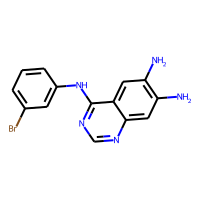

In [98]:
project1.Ligand()

# NBVAL_CHECK_OUTPUT

<div style="text-align: justify"> 
    All of this information and some other properties are also stored separately as instance attributes.
</div>

<br>

<div style="text-align: justify"> 
    For example, the ligand's identifiers:
</div>

In [99]:
project1.Ligand.iupac_name

# NBVAL_CHECK_OUTPUT

'4-N-(3-bromophenyl)quinazoline-4,6,7-triamine'

In [100]:
project1.Ligand.cid

# NBVAL_CHECK_OUTPUT

'2426'

<div style="text-align: justify"> 
    Or some of its physiochemical properties:
</div>

In [101]:
project1.Ligand.mol_weight

# NBVAL_CHECK_OUTPUT

330.189

In [103]:
project1.Ligand.logp

# NBVAL_CHECK_OUTPUT

3.3

<div style="text-align: justify">
    We have also implemented some useful functions as methods for the <b><i>Ligand</i></b> class. For example, the <b><i>remove_counterion</i></b> method can be used to remove salt compounds from the main molecule in the SMILES. This is necessary for the docking process as <i>Smina</i> can have problems processing PDBQT files of salt compounds. 
</div>

<br>

<div style="text-align: justify">
    Calling this method will simply return the modified SMILES. In the case of our ligand, which is not charged and does not have a counter-ion, the original SMILES is returned: 
</div>

In [104]:
project1.Ligand.remove_counterion()

# NBVAL_CHECK_OUTPUT

'C1=CC(=CC(=C1)Br)NC2=NC=NC3=CC(=C(C=C32)N)N'

<a id='5_practical'></a>

## Binding Site Detection

<div style="text-align: justify">
    Now that the processing of all input data is completed, we can commence implementing the pipeline's processes. We start with the binding site detection process, where a suitable binding site should be identified for the target protein. In the input CSV file, you'll notice thatthe user has the option to select between three definition methods for the binding site:
</div>

1. ***coordinates***: The user must specify the coordinates of the binding site. In this case, there is no need for binding-site detection. 
2. ***ligand***: The user should specify the ID of a co-crystallized ligand in the protein structure. This will then be used here to define the binding site. 
3. ***detection***: The user should specify a ***detection method***. 

<div style="text-align: justify">
    For this talktorial we will implement one detection method, the <b><i>DoGSiteScorer</i></b> functionality of the <a href="https://proteins.plus"><b><i>ProteinsPlus</i></b></a> webserver. For this we first need to create a helper-class for communicating with the webserver's API and submitting detection jobs. We will then import the pipeline's <b><i>BindingSiteDetection</i></b> class, which processes the input specification data on the binding site, and acts accordingly. 
</div>    


### Implementing The Required Functions: The ***DoGSiteScorer*** Helper-Class

<div style="text-align: justify">
    <i>DoGSiteScorer</i> provides a web-service <a href="https://proteins.plus/help/dogsite_rest">API</a>. This can be used to submit binding-site detection jobs, either by providing the PDB-code of protein structure, or by uploading its PDB file. It will then return a table of all detected pockets and sub-pockets and their corresponding descriptors.For each detected (sub-)pocket, a PDB file and a CCP4 file is generated which can be downloaded and used to define the coordinates of the pocket of sub-pocket needed for the docking calculation and visualization. The function <b><i>select_best_pocket</i></b> is also defined which provides several methods for selecting the most suitable binding-site.
</div>

<br>

<div style="text-align: justify">
    <i><b>Note:</b></i> For a demonstration of each function, see the <a href="#dogsitescorer_demo">corresponding section</a> in <i>Supplementary Information</i>.
</div>

### Implementing The Pipeline's ***BindingSiteDetection*** Class

<div style="text-align: justify">
    Now we can automate the binding-site detection process by implementing the <b><i>BindingSiteDetection</i></b> class of the pipeline. Depending on the input binding site specification data, the corresponding processes are carried out to output the coordinates of the selected binding site based on the input data.
</div>

### Automatically Calculating the Binding-Site: Instantiating The ***BindingSiteDetection*** Class

<div style="text-align: justify">
    We can now instantiate the <b><i>BindingSiteDetection</b></i> class using the <b><i>Protein</b></i> object, the <b><i>Specs.BindingSite</b></i> object, and the binding-site output path of our project. This will automatically run all the processes needed to build the structure of the binding-site, based on the specifications in the input data. The results will then be stored as instance attributes in the instantiated <b><i>BindingSiteDetection</b></i> object. 
</div>

<br>

<div style="text-align: justify">
    We thus assign this object to our project: 
</div>

In [105]:
from utils import DoGSiteScorer, BindingSiteDetection

project1.BindingSiteDetection = BindingSiteDetection(
    project1.Protein,
    project1.Specs.BindingSite,
    project1.Specs.OutputPaths.binding_site_detection,
)

<div style="text-align: justify">
    All intermediate information leading to the selected binding-pocket's coordinates is now stored in the <b><i>BindingSiteDetection</b></i> instance of our project.
</div>

<br>

<div style="text-align: justify">
    For example, a dataframe containing all retrieved information on all detected binding sites:
</div>

In [106]:
project1.BindingSiteDetection.dogsitescorer_binding_sites_df

# NBVAL_CHECK_OUTPUT

,lig_cov,poc_cov,lig_name,volume,enclosure,surface,depth,surf/vol,lid/hull,ellVol,ell c/a,ell b/a,siteAtms,accept,donor,hydrophobic_interactions,hydrophobicity,metal,Cs,Ns,Os,Ss,Xs,negAA,posAA,polarAA,apolarAA,ALA,ARG,ASN,ASP,CYS,GLN,GLU,GLY,HIS,ILE,LEU,LYS,MET,PHE,PRO,SER,THR,TRP,TYR,VAL,simpleScore,drugScore,pdb_file_url,ccp4_file_url
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P_0,85.48,31.22,W32_A_1101,1422.66,0.10,1673.75,19.26,1.176493,-,-,0.13,0.67,288,86,40,71,0.36,0,198,45,41,4,0,0.10,0.13,0.24,0.53,4,5,2,5,2,2,1,5,0,3,12,3,2,3,3,1,2,1,1,5,0.63,0.810023,https://proteins.plus/results/dogsite/hy3pFFwQv1ecUMY2bh9tcErj/3w32_P_0_res.pdb,https://proteins.plus/results/dogsite/hy3pFFwQv1ecUMY2bh9tcErj/3w32_P_0_gpsAll.ccp4.gz
P_0_0,85.48,73.90,W32_A_1101,599.23,0.06,540.06,17.51,0.901257,-,-,0.14,0.22,131,35,13,25,0.34,0,95,16,17,3,0,0.03,0.10,0.28,0.59,1,2,1,1,2,1,0,2,0,2,7,1,2,2,1,0,2,0,0,2,0.59,0.620201,https://proteins.plus/results/dogsite/hy3pFFwQv1ecUMY2bh9tcErj/3w32_P_0_0_res.pdb,https://proteins.plus/results/dogsite/hy3pFFwQv1ecUMY2bh9tcErj/3w32_P_0_0_gpsAll.ccp4.gz
P_0_1,3.23,0.44,W32_A_1101,201.73,0.08,381.07,11.36,1.889010,-,-,0.17,0.25,51,17,9,10,0.28,0,36,6,7,2,0,0.08,0.17,0.25,0.50,1,1,0,1,1,1,0,0,0,0,3,1,1,0,0,0,1,0,0,1,0.17,0.174816,https://proteins.plus/results/dogsite/hy3pFFwQv1ecUMY2bh9tcErj/3w32_P_0_1_res.pdb,https://proteins.plus/results/dogsite/hy3pFFwQv1ecUMY2bh9tcErj/3w32_P_0_1_gpsAll.ccp4.gz
P_0_2,0.00,0.00,W32_A_1101,185.60,0.17,282.00,9.35,1.519397,-,-,0.45,0.55,48,17,8,12,0.32,0,31,8,8,1,0,0.17,0.25,0.08,0.50,0,2,0,1,0,0,1,1,0,0,2,1,1,1,0,0,0,0,0,2,0.13,0.195695,https://proteins.plus/results/dogsite/hy3pFFwQv1ecUMY2bh9tcErj/3w32_P_0_2_res.pdb,https://proteins.plus/results/dogsite/hy3pFFwQv1ecUMY2bh9tcErj/3w32_P_0_2_gpsAll.ccp4.gz
P_0_3,6.45,0.29,W32_A_1101,175.30,0.15,297.42,9.29,1.696634,-,-,0.23,0.37,48,16,8,14,0.37,0,32,8,8,0,0,0.14,0.14,0.36,0.36,1,1,1,2,0,0,0,3,0,0,1,1,0,1,1,1,0,0,0,1,0.13,0.168845,https://proteins.plus/results/dogsite/hy3pFFwQv1ecUMY2bh9tcErj/3w32_P_0_3_res.pdb,https://proteins.plus/results/dogsite/hy3pFFwQv1ecUMY2bh9tcErj/3w32_P_0_3_gpsAll.ccp4.gz
P_0_4,0.00,0.00,W32_A_1101,170.37,0.08,390.10,11.99,2.289722,-,-,0.16,0.20,47,14,7,17,0.45,0,34,7,6,0,0,0.00,0.18,0.18,0.64,2,2,0,0,0,1,0,0,0,1,3,0,0,0,0,0,0,1,1,0,0.15,0.223742,https://proteins.plus/results/dogsite/hy3pFFwQv1ecUMY2bh9tcErj/3w32_P_0_4_res.pdb,https://proteins.plus/results/dogsite/hy3pFFwQv1ecUMY2bh9tcErj/3w32_P_0_4_gpsAll.ccp4.gz
P_0_5,0.00,0.00,W32_A_1101,90.43,0.24,177.50,6.24,1.962844,-,-,0.70,0.89,26,8,6,5,0.26,0,16,6,4,0,0,0.12,0.25,0.25,0.38,0,1,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,2,0.00,0.165232,https://proteins.plus/results/dogsite/hy3pFFwQv1ecUMY2bh9tcErj/3w32_P_0_5_res.pdb,https://proteins.plus/results/dogsite/hy3pFFwQv1ecUMY2bh9tcErj/3w32_P_0_5_gpsAll.ccp4.gz
P_1,0.00,0.00,W32_A_1101,708.99,0.13,1030.19,14.32,1.453039,-,-,0.14,0.59,140,44,13,34,0.37,0,98,17,25,0,0,0.14,0.11,0.36,0.39,3,1,1,0,0,0,4,4,0,1,4,2,0,1,1,2,2,0,1,1,0.46,0.755915,https://proteins.plus/results/dogsite/hy3pFFwQv1ecUMY2bh9tcErj/3w32_P_1_res.pdb,https://proteins.plus/results/dogsite/hy3pFFwQv1ecUMY2bh9tcErj/3w32_P_1_gpsAll.ccp4.gz
P_1_0,0.00,0.00,W32_A_1101,496.90,0.11,739.17,12.72,1.487563,-,-,0.14,0.18,103,34,8,22,0.34,0,74,12,17,0,0,0.18,0.09,0.32,0.41,2,1,1,0,0,0,4,1,0,1,4,1,0,0,1,2,2,0,1,1,0.49,0.465489,https://proteins.plus/results/dogsite/hy3pFFwQv1ecUMY2bh9tcErj/3w32_P_1_0_res.pdb,https://proteins.plus/results/dogsite/hy3pFFwQv1ecUMY2bh9tcErj/3w32_P_1_0_gpsAll.ccp4.gz


<div style="text-align: justify">
    The name of the selected binding site:
</div>    

In [107]:
project1.BindingSiteDetection.best_binding_site_name

# NBVAL_CHECK_OUTPUT

'P_0_0'

<div style="text-align: justify">
    The coordinates of the selected binding site are also assigned to the <b><i>Protein</b></i> object in the project:
</div>    

In [108]:
project1.Protein.binding_site_coordinates

# NBVAL_CHECK_OUTPUT

{'center': [15.91, 32.33, 11.03], 'size': [24.84, 24.84, 24.84]}

<div style="text-align: justify">
    We can also visualize the selected binding pocket:
</div>

In [ ]:
project1.BindingSiteDetection.visualize_best()

<div style="text-align: justify">
    Or any other binding pocket by providing its name:
</div>

In [109]:
project1.BindingSiteDetection.visualize("P_0")

NGLWidget()

<a id='6_practical'></a>

## Ligand Similarity Search

<div style="text-align: justify">
    With the coordinates of the protein's binding-site in hand, we now focus on the ligand similarity-search part of the pipeline. To perform a similarity-search, we will use the <i>PubChem</i> webserver. We have already implemented all the required functions to perform the similarity-search in the <b><i>PubChem</i></b> helper-class that we used for developing the <b><i>Ligand</i></b> class. We can now directly commence with writing the <b><i>LigandSimilaritySearch</i></b> class of the pipeline. 
</div>

<div style="text-align: justify">
    Again, for a demonstration of each function, see the <a href="#dogsitescorer_demo">corresponding section</a> in <i>Supplementary Information</i>.
</div>

### Implementing The Pipeline's ***LigandSimilaritySearch*** Class

<div style="text-align: justify"> 
    Here the similarity-search process of the pipeline is automated. This class will take in the <b><i>Ligand</i></b> object and the <b><i>Specs.LigandSimilaritySearch</i></b> object of the pipeline and initialize a similarity-search using the <i>PubChem</i> webserver. Several drug-likeness scores are subsequently calculated for each of the analogs retrieved. Using these scores, a given number (specified in the input file) of most drug-like analogs are then selected and used to create <b><i>Ligand</i></b> objects with the help of the <b><i>Ligand</i></b> class that we defined earlier. 
</div>

#### Finding Structural Analogs of the Input Ligand: Instantiating The ***LigandSimilaritySearch*** Class

<div style="text-align: justify">
    By instantiating the <b><i>LigandSimilaritySearch</i></b> class with the <b><i>Ligand</i></b> object and the <b><i>Specs.LigandSimilaritySearch</i></b> data-class of the project, analogs are automatically found and turned to <b><i>Ligand</i></b> objects. These are assigned as an instance attribute to the <b><i>LigandSimilaritySearch</i></b> class as well as the input <b><i>Ligand</i></b> object. For this project, this process will take <b> about 2 minutes </b> to complete. 
</div>

<br>

<div style="text-align: justify">
    We instantiate the class and assign it to our project:
</div>

In [110]:
from utils import LigandSimilaritySearch

project1.LigandSimilaritySearch = LigandSimilaritySearch(
    project1.Ligand,
    project1.Specs.LigandSimilaritySearch,
    project1.Specs.OutputPaths.similarity_search,
)

<div style="text-align: justify">
    Now we can view the full list of all fetched analogs, their calculated physiochemical properties and drug-likeness scores. Shown here are the first 5 entries:
</div>

,CanonicalSMILES,Mol,dice_similarity,mol_weight,num_H_acceptors,num_H_donors,logp,tpsa,num_rot_bonds,saturation,drug_score_qed,drug_score_lipinski,drug_score_custom,drug_score_total
CID,,,,,,,,,,,,,,
4705,COC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(=CC=C3)Br)OC,,0.80,360.211,5,1,4.15,56.27,4,0.12,0.76,1.0,0.74,0.79
62274,CC1=CC2=C(C=CC=N2)C3=C1N(C(=N3)N)C,,0.34,212.256,4,1,2.01,56.73,0,0.17,0.62,1.0,0.70,0.71
2723800,CC1=CC2=C(C=C1N)[N+](=C3C=C(C(=CC3=N2)C)N)C4=CC=CC=C4.[Cl-],,0.33,350.853,3,2,0.45,68.81,1,0.10,0.30,1.0,0.70,0.55
7019,C1=CC=C2C(=C1)C(=C3C=CC=CC3=N2)N,,0.33,194.237,2,1,2.97,38.91,0,0.00,0.56,1.0,0.63,0.66
62389,C1=CC=C(C=C1)CNC2=NC=NC3=C2NC=N3,,0.32,225.255,4,2,1.96,66.49,3,0.08,0.71,1.0,0.76,0.78

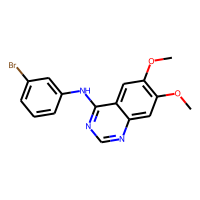
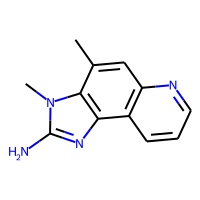
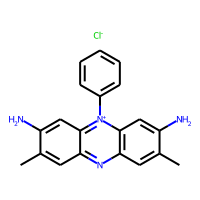
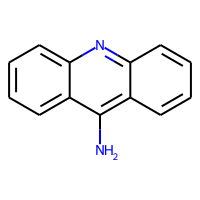
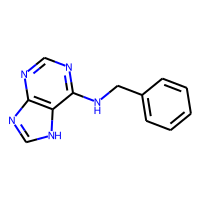

In [111]:
project1.LigandSimilaritySearch.all_analogs.head()

# NBVAL_CHECK_OUTPUT

<div style="text-align: justify">
    From these analogs, a certain number of most drug-like compounds are selected according to the input specifications.  These selected analogs are then turned into <b><i>Ligand</i></b> objects and assigned to the input <b><i>Ligand</b></i> under the attribute name <b><i>analogs</b></i>: 
</div>

In [112]:
project1.Ligand.analogs

# NBVAL_CHECK_OUTPUT

{'65997': <Ligand CID: 65997>,
 '2435': <Ligand CID: 2435>,
 '57469': <Ligand CID: 57469>,
 '4705': <Ligand CID: 4705>,
 '5011': <Ligand CID: 5011>,
 '62389': <Ligand CID: 62389>,
 '11292933': <Ligand CID: 11292933>,
 '214347': <Ligand CID: 214347>,
 '1530': <Ligand CID: 1530>,
 '11256587': <Ligand CID: 11256587>,
 '1935': <Ligand CID: 1935>,
 '62274': <Ligand CID: 62274>,
 '53462': <Ligand CID: 53462>,
 '6451164': <Ligand CID: 6451164>,
 '62275': <Ligand CID: 62275>,
 '7019': <Ligand CID: 7019>,
 '62805': <Ligand CID: 62805>,
 '675': <Ligand CID: 675>,
 '135398510': <Ligand CID: 135398510>,
 '5546': <Ligand CID: 5546>}

<div style="text-align: justify">
    The list contains <b><i>Ligand</b></i> objects corresponding to each analog found. Each analog has thus its own attributes and methods, just like our input <b><i>Ligand</b></i>, which can be accessed separately via the analog's CID. For example:
</div>

Value
Structure                                                                                                                                                                                                Property                                                                                                                    
<img data-content="rdkit/molecule" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAADICAIAAAAiOjnJAAAABmJLR0QA/wD/AP+gvaeTAAAd80lEQVR4nO2deVxUR7bHz+1mXxQBUSFGwSWAGnQUdUSNCRA3IOoMcdwS13aZiIm... name                                                                                                              Lerisetron
                                                                                                                                                                                                         iupac_name                                                                            1-benzyl-2-piperazin-1-ylbenzimidazole
                                                                                                                                                                                                         smiles                                                                               C1CN(CCN1)C2=NC3=CC=CC=C3N2CC4=CC=CC=C4
                                                                                                                                                                                                         cid                                                                                                                    65997
                                                                                                                                                                                                         inchi                InChI=1S/C18H20N4/c1-2-6-15(7-3-1)14-22-17-9-5-4-8-16(17)20-18(22)21-12-10-19-11-13-21/h1-9,19H,10-14H2
                                                                                                                                                                                                         inchikey                                                                                         PWWDCRQZITYKDV-UHFFFAOYSA-N
                                                                                                                                                                                                         mol_weight                                                                                                           292.386
                                                                                                                                                                                                         num_H_acceptors                                                                                                            4
                                                                                                                                                                                                         num_H_donors                                                                                                               1
                                                                                                                                                                                                         logp                                                                                                                    2.49
                                                                                                                                                                                                         tpsa                                                                                                                   33.09
                                                                                  
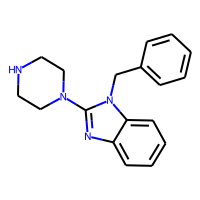

In [113]:
project1.Ligand.analogs["65997"]()

# NBVAL_CHECK_OUTPUT

<a id='7_practical'></a>

## Molecular Docking 

<div style="text-align: justify">
    We now have successfully defined the binding site of our input protein and found a list of analogs for our input ligand. The next step in the pipeline is to perform docking calculations on the input protein's binding site using the ligand analogs. But before that we need to import some helper functions that are needed to prepare the protein and the analogs for docking.
</div>

<br>

<div style="text-align: justify">
    Again, all classes and helper functions are are stored in a separate file (utils.py) to be imported and used as necessary. Feel free to peruse that file if you would like to know more about the exact operations that are being done when the code is executed.
</div>

### Implementing The Required Functions: The ***OBabel*** Helper-Class

<div style="text-align: justify">
    Here the <b><i><a href="https://github.com/pybel/pybel">Pybel</a></i></b> package of the <b><i><a href="http://openbabel.org/wiki/Main_Page">OpenBabel</a></i></b> program is used in order to implement the functions needed to prepare the protein and the ligand analogs for docking.
</div>

### Implementing The Required Functions: The ***Smina*** Helper-Class

<div style="text-align: justify">
    For docking we are going to use the <a href="https://sourceforge.net/projects/smina/"><b><i>Smina</i></b></a> program. It does not have a Python-API but we can simply communicate with the program via the <b><i>subprocess</i></b> library which can execute shell commands. We also need to write a function to read the output log of the program and extract useful data. These functions are implemented in the <b><i>Smina</i></b> helper-class.
</div>

### Implementing The Pipeline's ***Docking*** Class

<div style="text-align: justify">
    Finally, the <b><i>Docking</b></i> class is implemented and automatically performs docking experiments on all provided ligands.
</div>

### Performing Docking Experiments on The Selected Analogs: Instantiating The ***Docking*** Class

<div style="text-align: justify">
    By instantiating the <b><i>Docking</i></b> class with the <b><i>Protein</i></b> object, the list of analogs and the <b><i>Specs.Docking</i></b> data class of the project, analogs are automatically docked into the protein and results are stored separately for each docking pose. Other meaningful information is extracted from the results of all docking poses for each analog and stored separately. This is the most computationally intense process of the pipeline and will take <b> 5 to 10 minutes </b> (for 20 ligands) to complete.
</div>

<br>

<div style="text-align: justify">
    We instantiate the class and assign it to our project:
</div>

In [114]:
from utils import OBabel, Smina, Docking

project1.Docking = Docking(
    project1.Protein,
    list(project1.Ligand.analogs.values()),
    project1.Specs.Docking,
    project1.Specs.OutputPaths.docking,
)

<div style="text-align: justify">
    We can now view all the calculated docking parameters for each docking pose of each analog. Here we show only the 5 first enteries:
</div>

In [115]:
project1.Docking.results_dataframe.sort_values(by="affinity[kcal/mol]").head()

# NBVAL_CHECK_OUTPUT

affinity[kcal/mol]  dist from best mode_rmsd_l.b  \
CID       mode                                                     
11292933  1                  -10.3                         0.000   
          2                  -10.2                         1.379   
          3                  -10.0                         1.777   
135398510 1                  -10.0                         0.000   
11292933  4                   -9.8                         1.681   

                dist from best mode_rmsd_u.b  drug_score_total  
CID       mode                                                  
11292933  1                            0.000              0.77  
          2                            2.437              0.77  
          3                            1.941              0.77  
135398510 1                            0.000              0.62  
11292933  4                            1.971              0.77

<div style="text-align: justify">
    Alternatively, by accessing a specific analog, we can view the full results for that analog using the attribute <b><i>dataframe_docking</b></i>:
</div>

In [116]:
project1.Ligand.analogs["11292933"].dataframe_docking

# NBVAL_CHECK_OUTPUT

,affinity[kcal/mol],dist from best mode_rmsd_l.b,dist from best mode_rmsd_u.b
mode,,,
1,-10.3,0.000,0.000
2,-10.2,1.379,2.437
3,-10.0,1.777,1.941
4,-9.8,1.681,1.971
5,-9.7,2.727,10.127


<div style="text-align: justify">
    A summary of the docking results (e.g. highest/mean binding affinities) are also added to the main dataframe of each analog and can be viewed by calling its object. Here only the most relevant seven rows are shown:
</div>    

Value
Structure                                                                                                                                                                                                Property                                 
<img data-content="rdkit/molecule" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAADICAIAAAAiOjnJAAAABmJLR0QA/wD/AP+gvaeTAAAaVElEQVR4nO3deVgT194H8F8IRDYVClVBrBTFhSCiEVxQsWL1qlxFLa8WBfVaQUV... binding_affinity_best               -10.3
                                                                                                                                                                                                         binding_affinity_mean               -10.0
                                                                                                                                                                                                         binding_affinity_std             0.254951
                                                                                                                                                                                                         docking_poses_dist_rmsd_lb_mean    1.5128
                                                                                                                                                                                                         docking_poses_dist_rmsd_lb_std   0.984739
                                                                                                                                                                                                         docking_poses_dist_rmsd_ub_mean    3.2952
                                                                                                                                                                                                         docking_poses_dist_rmsd_ub_std    3.93242
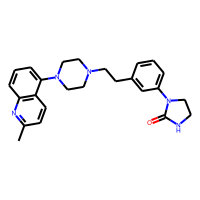

In [117]:
project1.Ligand.analogs["11292933"]().tail(7)

# NBVAL_CHECK_OUTPUT

<div style="text-align: justify">
    The same summary results are also added as instance attributes for each object:
</div>    

In [118]:
project1.Ligand.analogs["11292933"].binding_affinity_best

# NBVAL_CHECK_OUTPUT

-10.3

<div style="text-align: justify">
    Now with the help of the <b><i>NGLView</i></b> helper-class we defined earlier, we have also added methods to the <b><i>Docking</i></b> class for visualization of the docking poses. For example, we can view all docking poses together in an interactive way using the <b><i>visualize_all_poses</i></b> method. In this method, the docking poses are sorted by their binding affinities and labeled by their CID and corresponding docking pose number. By selecting an analog from the menu below, the viewer automatically shows the protein residues in close proximity (i.e. 6 Å) of the ligand, as well as its corresponding binding affinity.
</div>

<br>

<div style="text-align: justify">
    <b><i>Note:</i></b> If we are interested in visualization of a certain analog's docking poses, we can use the <b><i>visualize_analog_poses</i></b> method instead, and provide the analog's CID.
</div>    

In [ ]:
project1.Docking.visualize_all_poses()

<div style="text-align: justify">
    Now let's separately dock the input ligand in order to be able to compare the results later and see whether any of the analogs has a higher binding affinity:
</div>    

In [119]:
project1.Ligand.Docking = Docking(
    project1.Protein,
    [project1.Ligand],
    project1.Specs.Docking,
    project1.Specs.OutputPaths.ligand,
)

<div style="text-align: justify">
    Similar to the analogs, the docking results of the input ligand is also stored in it's object. 
</div>    

<br>

<div style="text-align: justify">
    For example, to see the docking dataframe:
</div>   

In [120]:
project1.Ligand.dataframe_docking

# NBVAL_CHECK_OUTPUT

,affinity[kcal/mol],dist from best mode_rmsd_l.b,dist from best mode_rmsd_u.b
mode,,,
1,-8.5,0.000,0.000
2,-8.5,3.772,5.308
3,-8.5,1.230,1.632
4,-8.4,3.668,5.309
5,-8.2,4.352,6.785


<a id='8_practical'></a>

## Analysis of Protein–Ligand Interactions

<div style="text-align: justify">
    With the calculated docking poses of each analog in hand, we can now focus on analyzing the protein-ligand interactions in each docking pose of each analog. For the analysis we use the <b><i>PLIP</b></i> package, for which a helper class is defined.
</div>    

### Implementing The Required Functions: The ***PLIP*** Helper-Class

<div style="text-align: justify">
    Here the <a href="https://github.com/pharmai/plip">PLIP</a> package is used to implement the functions needed to analyze the protein-ligand interactions.
</div>

### Implementing The Pipeline's ***InteractionAnalysis*** Class

<div style="text-align: justify">
    The <b><i>InteractionAnalysis</b></i> class is now implemented. The class automatically calculates all interaction information for each docking pose of each ligand. 
</div>

### Analyzing the Protein-Ligand Interactions in Calculated Docking Poses: Instantiating The ***InteractionAnalysis*** Class

<div style="text-align: justify">
    The <b><i>InteractionAnalysis</b></i> class can be instantiated by providing the filepaths of the separated protein structure, a list of all analogs (as <b><i>Ligand</b></i> objects), the results dataframe of the docking process, and the output path for storing the interaction analysis data:
</div>    

In [121]:
from utils import PLIP, InteractionAnalysis

project1.InteractionAnalysis = InteractionAnalysis(
    project1.Docking.pdbqt_filepath_extracted_protein,
    project1.Docking.pdb_filepath_extracted_protein,
    project1.Protein.residue_number_first,
    list(project1.Ligand.analogs.values()),
    project1.Docking.master_df,
    project1.Specs.InteractionAnalysis,
    project1.Specs.OutputPaths.interaction_analysis,
)

<div style="text-align: justify">
    The interactions can now be inspected collectively for all docking poses of all analogs. Here only the number of interactions are recorded for each interaction type (showing only the 5 first entries):
</div>

In [122]:
project1.InteractionAnalysis.results.sort_values(
    by="total_num_interactions", ascending=False
).head()

# NBVAL_CHECK_OUTPUT

,,affinity[kcal/mol],dist from best mode_rmsd_l.b,dist from best mode_rmsd_u.b,drug_score_total,total_num_interactions,h_bond,hydrophobic,salt_bridge,water_bridge,pi_stacking,pi_cation,halogen,metal
CID,mode,,,,,,,,,,,,,
11256587,5,-7.9,2.022,3.551,0.75,13,2,10,1,0,0,0,0,0
11292933,5,-9.7,2.727,10.127,0.77,13,0,13,0,0,0,0,0,0
62805,2,-7.2,2.675,5.394,0.65,11,4,7,0,0,0,0,0,0
11292933,2,-10.2,1.379,2.437,0.77,11,2,9,0,0,0,0,0,0
5011,1,-7.3,0.000,0.000,0.79,10,3,6,0,0,0,1,0,0


<div style="text-align: justify">
    If we are interested in the details of a specific interaction type for a specific docking pose, we can access this information from the corresponding <b><i>Ligand</b></i> objects of the analogs. 
</div>    

<br>

<div style="text-align: justify">
    For example, accessing the data for hydrophobic interactions of the docking pose 1 of analog 65997 (showing only the 5 first entries):
</div>    

In [123]:
project1.Ligand.analogs["65997"].docking_pose_1_interactions_hydrophobic.head()

# NBVAL_CHECK_OUTPUT

,RESNR,RESTYPE,RESCHAIN,RESNR_LIG,RESTYPE_LIG,RESCHAIN_LIG,DIST,LIGCARBONIDX,PROTCARBONIDX,LIGCOO,PROTCOO
0,790,THR,A,1,UNL,A,3.87,2566,307,"(15.827, 34.162, 10.688)","(12.237, 33.433, 9.444)"
1,792,LEU,A,1,UNL,A,4.00,2557,1005,"(14.082, 35.162, 16.357)","(11.186, 37.568, 15.018)"
2,844,LEU,A,1,UNL,A,3.73,2558,1215,"(14.77, 34.277, 15.519)","(13.961, 30.7, 14.816)"
3,854,THR,A,1,UNL,A,3.86,2569,1250,"(17.831, 32.471, 11.624)","(16.714, 28.916, 12.649)"
4,743,ALA,A,1,UNL,A,3.69,2566,521,"(15.827, 34.162, 10.688)","(13.145, 36.521, 11.607)"


<div style="text-align: justify">
    Or hydrogen-bond interactions of docking pose 2 of analog 11292933:
</div>    

In [124]:
project1.Ligand.analogs["11292933"].docking_pose_2_interactions_h_bond.head()

# NBVAL_CHECK_OUTPUT

,RESNR,RESTYPE,RESCHAIN,RESNR_LIG,RESTYPE_LIG,RESCHAIN_LIG,SIDECHAIN,DIST_H-A,DIST_D-A,DON_ANGLE,PROTISDON,DONORIDX,DONORTYPE,ACCEPTORIDX,ACCEPTORTYPE,LIGCOO,PROTCOO
0,855,ASP,A,1,UNL,A,False,3.38,3.84,110.79,True,29,Nam,2575,Nam,"(17.329, 28.265, 5.733)","(17.692, 27.727, 9.517)"
1,856,PHE,A,1,UNL,A,False,2.04,2.89,139.69,False,2575,Nam,20,O2,"(17.329, 28.265, 5.733)","(18.707, 25.862, 4.918)"


<div style="text-align: justify">
    Again, a summary of interaction analysis data is also added to each analog's main dataframe. This can be viewed by calling the object here showing only the relevant data, i.e. the last 9 rows:
</div>    

Value
Structure                                                                                                                                                                                                Property                            
<img data-content="rdkit/molecule" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAADICAIAAAAiOjnJAAAABmJLR0QA/wD/AP+gvaeTAAAaVElEQVR4nO3deVgT194H8F8IRDYVClVBrBTFhSCiEVxQsWL1qlxFLa8WBfVaQUV... average_num_total_interactions   9.8
                                                                                                                                                                                                         average_num_h_bond               1.6
                                                                                                                                                                                                         average_num_hydrophobic          8.2
                                                                                                                                                                                                         average_num_salt_bridge          0.0
                                                                                                                                                                                                         average_num_water_bridge         0.0
                                                                                                                                                                                                         average_num_pi_stacking          0.0
                                                                                                                                                                                                         average_num_pi_cation            0.0
                                                                                                                                                                                                         average_num_halogen              0.0
                                                                                                                                                                                                         average_num_metal                0.0
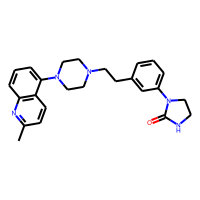

In [125]:
project1.Ligand.analogs["11292933"]().tail(9)

# NBVAL_CHECK_OUTPUT

<div style="text-align: justify">
    Let's use <b><i>plot_interaction_affinity_correlation</b></i> function and see if there is any visible correlation between the calculated binding affinities and the number of interactions for each docking pose:
</div>    

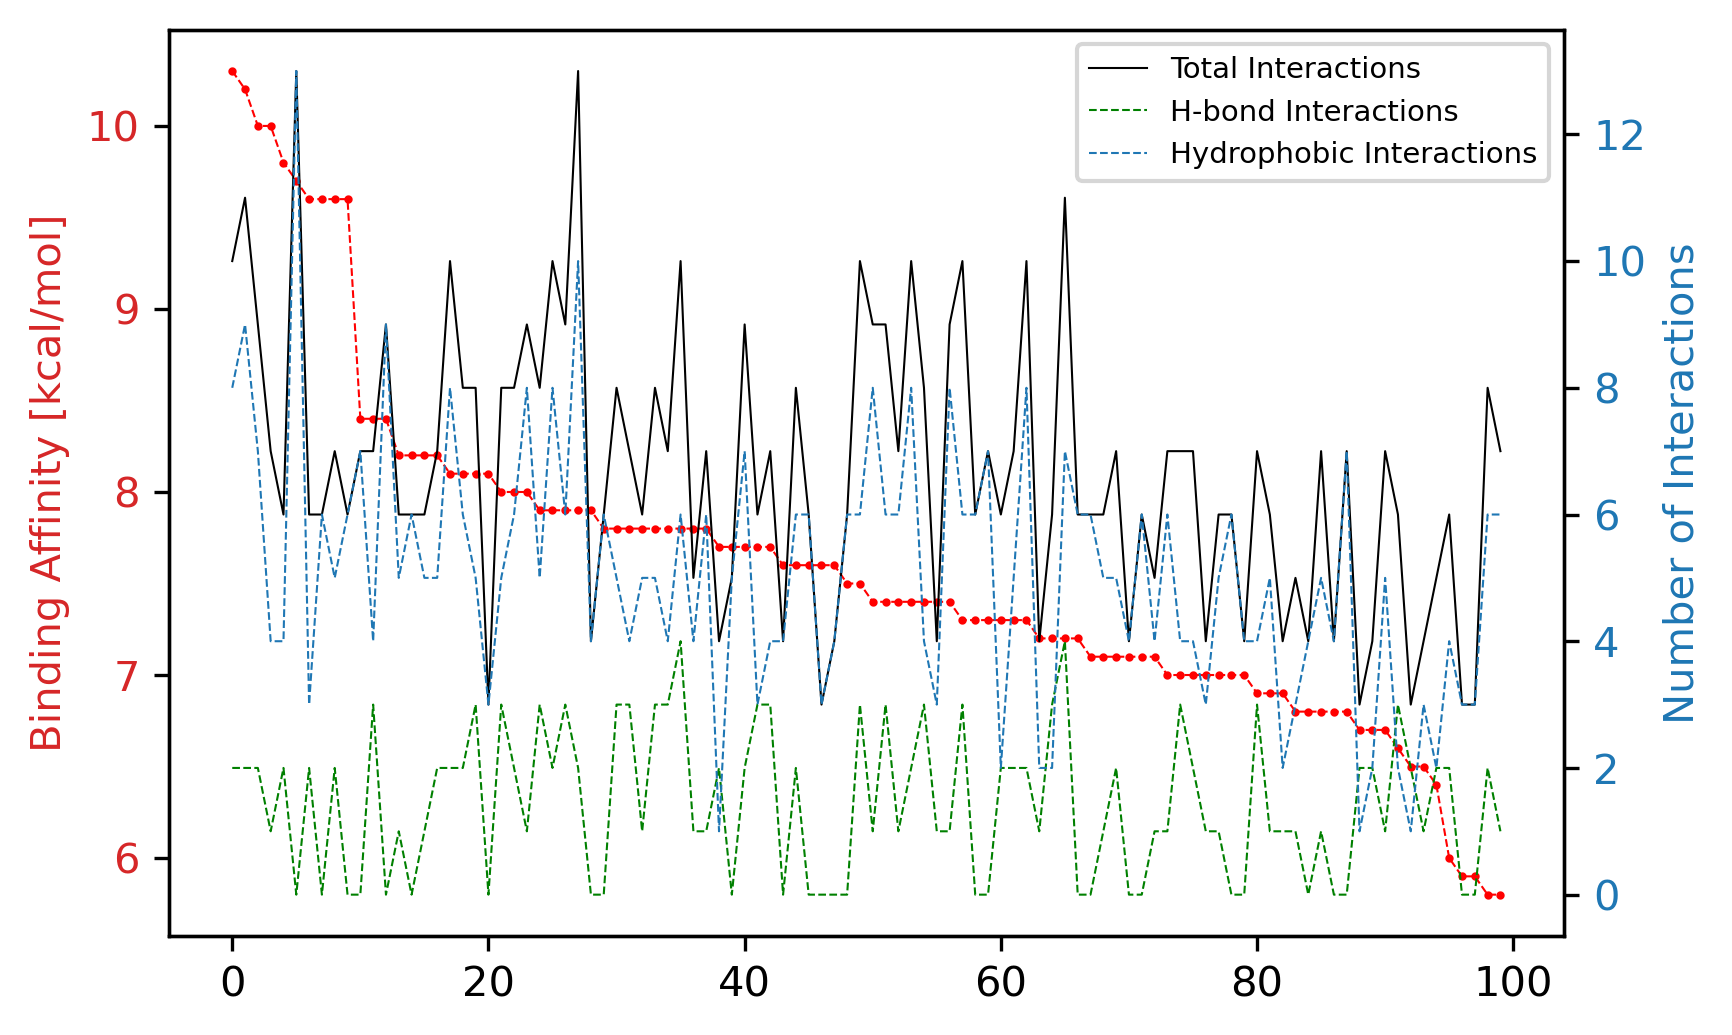

In [126]:
project1.InteractionAnalysis.plot_interaction_affinity_correlation()

<div style="text-align: justify">
    As can be seen, no obvious correlation is visible between the two sets of data; The number of total interactions seems to be very weakly correlated with the binding affinity, however, with several outliers.
</div>

<br>

<div style="text-align: justify">
    Now with the help of the <b><i>NGLView</i></b> helper-class we defined earlier, we have also added methods to the <b><i>InteractionAnalysis</i></b> class for visualization of the protein-ligand interactions. For example, we can view the interactions for all docking poses in an interactive way. Here, by selecting each docking pose (labeled by their CID and mode-number and sorted by their binding affinities), all the interacting residues are shown. The interactions are visualized with colored lines for which a color-map is also provided.
</div>

<br>

<div style="text-align: justify">
    If we are interested in visualization of a certain analog's interactions, we can use the <b><i>visualize_analog_interactions</i></b> method instead, and provide the analog's CID.
</div>

In [ ]:
project1.InteractionAnalysis.visualize_all_interactions()

<div style="text-align: justify">
    We can also search for docking poses with a specific set of interactions with specific residues of the protein using the <b><i>find_poses_with_specific_interactions</b></i> method. 
</div>    

<br>

<div style="text-align: justify">
    For example, many EGFR inhibitors are involved in hydrogen-bonding with the M793 residue of the protein. To find the docking poses that exhibit this interaction:
</div>    

In [127]:
desired_interactions = project1.InteractionAnalysis.find_poses_with_specific_interactions(
    [["h_bond", 793]], "any"
)
desired_interactions

# NBVAL_CHECK_OUTPUT

[('65997', 2),
 ('1935', 1),
 ('53462', 4),
 ('62275', 4),
 ('7019', 1),
 ('7019', 2),
 ('5546', 3),
 ('5546', 4)]

<div style="text-align: justify">
    And we can also visualize the results separately instead of looking for them in the menu of the viewer above.
</div>    

In [ ]:
project1.InteractionAnalysis.visualize_docking_poses_interactions(desired_interactions)

<div style="text-align: justify">
    Now let's also analyze the interactions in the docking poses of the input ligand:
</div>    

In [128]:
project1.Ligand.InteractionAnalysis = InteractionAnalysis(
    project1.Docking.pdbqt_filepath_extracted_protein,
    project1.Docking.pdb_filepath_extracted_protein,
    project1.Protein.residue_number_first,
    [project1.Ligand],
    project1.Ligand.Docking.master_df,
    project1.Specs.InteractionAnalysis,
    project1.Specs.OutputPaths.ligand,
)

<div style="text-align: justify">
    The results can be viewed in a similar way to the analogs. For example, to view the summary data:
</div>    

In [129]:
project1.Ligand.InteractionAnalysis.results.sort_values(
    by="total_num_interactions", ascending=False
)

# NBVAL_CHECK_OUTPUT

affinity[kcal/mol]  dist from best mode_rmsd_l.b  \
CID  mode                                                     
2426 1                   -8.5                         0.000   
     2                   -8.5                         3.772   
     3                   -8.5                         1.230   
     4                   -8.4                         3.668   
     5                   -8.2                         4.352   

           dist from best mode_rmsd_u.b  drug_score_total  \
CID  mode                                                   
2426 1                            0.000               0.7   
     2                            5.308               0.7   
     3                            1.632               0.7   
     4                            5.309               0.7   
     5                            6.785               0.7   

           total_num_interactions  h_bond  hydrophobic  salt_bridge  \
CID  mode                                                             
2426 1                          8       5            3            0   
     2                          8       2            6            0   
     3                          8       5            3            0   
     4                          7       2            5            0   
     5                          6       2            4            0   

           water_bridge  pi_stacking  pi_cation  halogen  metal  
CID  mode                                                        
2426 1                0            0          0        0      0  
     2                0            0          0        0      0  
     3                0            0          0        0      0  
     4                0            0          0        0      0  
     5                0            0          0        0      0

<a id='9_practical'></a>

## Selection of the Best Ligand

<div style="text-align: justify"> 
    At this point, we have carried out all the processes in the pipeline and have gathered all the information in our <b><i>LeadOptimizationPipeline</i></b> instance, i.e. <b><i>project1</i></b>. The project now contains all information required for making an optimal choice of analog. 
</div>

<br>

<div style="text-align: justify"> 
    To recap, we gathered a number of analogs to the input ligand and filtered them to choose those with the highest drug-likeness scores. We then calculated several docking poses and corresponding binding affinities for each analog and analyzed their interactions with the protein. Now we define a class <b><i>OptimizedLigands</i></b>, which takes in the whole project, and based on the specifications in the input file, selects the best analog. 
</div>

<br>

<div style="text-align: justify"> 
    Now we inport a class, <b><i>OptimizedLigands</i></b>, which takes in the whole project, and based on the specifications in the input file, selects the best analog. To do this, we instantiate the class, and assign it to our project:
</div>

In [130]:
from utils import OptimizedLigands

project1.OptimizedLigands = OptimizedLigands(project1)

<div style="text-align: justify"> 
    The class has a <b><i>__call__</b></i> method, which prints out a summary:
</div>    

In [131]:
project1.OptimizedLigands()

<span style='color:blue'>Number of docking poses with higher binding affinity than highest binding affinity of ligand: </span><span style='color:black'>10</span>

<span style='color:blue'>&nbsp;&nbsp;&nbsp;&nbsp;CIDs of analogs corresponding to these docking poses: </span><span style='color:black'>['11292933', '135398510']</span>

<span style='color:blue'>Number of docking poses with higher number of total interactions than highest interacting pose of ligand: </span><span style='color:black'>20</span>

<span style='color:blue'>&nbsp;&nbsp;&nbsp;&nbsp;CIDs of analogs corresponding to these docking poses: </span><span style='color:black'>['11292933', '11256587', '62805', '7019', '1935', '57469', '5546', '5011', '4705', '6451164', '65997']</span>

<span style='color:blue'>Number of docking poses with higher affinity and number of total interactions than best corresponding poses of ligand: </span><span style='color:black'>4</span>

<span style='color:blue'>&nbsp;&nbsp;&nbsp;&nbsp;CIDs of analogs corresponding to these docking poses: </span><span style='color:black'>['11292933']</span>

<span style='color:blue'>CIDs of analogs with higher binding affinity, number of total interactions and drug-likeness score than ligand: </span><span style='color:black'>['11292933']</span>

<span style='color:blue'>**CIDs of selected analogs as final output:** </span><span style='color:black'>['11292933']</span>

<span style='color:blue'>Comparison between the input ligand and optimized analog: </span><span style='color:black'></span>

,Input Ligand,Optimized Analog
Drug-Score,0.7,0.77
Highest Binding Affinity,-8.5,-10.30
Highest Number of Total Interactions,8.0,13.00


<div style="text-align: justify"> 
    As you can see, the pipeline successfully found an analog which is better than the input ligand in all of the three metrics, i.e. drug-likeness, binding affinity, and total number of protein-ligand interactions. We can simply visualize each of the above groups of analogs. 
</div>

<br>

<div style="text-align: justify"> 
    For example for visualizing the final output:
</div>

Value
Structure                                                                                                                                                                                                Property                                                                                                                                                                              
<img data-content="rdkit/molecule" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAADICAIAAAAiOjnJAAAABmJLR0QA/wD/AP+gvaeTAAAaVElEQVR4nO3deVgT194H8F8IRDYVClVBrBTFhSCiEVxQsWL1qlxFLa8WBfVaQUV... name                                                                                                  1-(3-(2-(4-(2-Methyl-5-quinolinyl)-1-piperazinyl)ethyl)phenyl)-2-imidazolidinone
                                                                                                                                                                                                         iupac_name                                                                                            1-[3-[2-[4-(2-methylquinolin-5-yl)piperazin-1-yl]ethyl]phenyl]imidazolidin-2-one
                                                                                                                                                                                                         smiles                                                                                                                      CC1=NC2=C(C=C1)C(=CC=C2)N3CCN(CC3)CCC4=CC(=CC=C4)N5CCNC5=O
                                                                                                                                                                                                         cid                                                                                                                                                                           11292933
                                                                                                                                                                                                         inchi                            InChI=1S/C25H29N5O/c1-19-8-9-22-23(27-19)6-3-7-24(22)29-16-14-28(15-17-29)12-10-20-4-2-5-21(18-20)30-13-11-26-25(30)31/h2-9,18H,10-17H2,1H3,(H,26,31)
                                                                                                                                                                                                         inchikey                                                                                                                                                   ANGUXJDGJCHGOG-UHFFFAOYSA-N
                                                                                                                                                                                                         mol_weight                                                                                                                                                                     415.541
                                                                                                                                                                                                         num_H_acceptors                                                                                                                                                                      4
                                                                                                                                                                                                         num_H_donors                                                                                                                                                                         1
                                                                                                                                                          
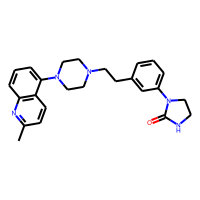

In [132]:
project1.OptimizedLigands.show_final_output()

# NBVAL_CHECK_OUTPUT

<a id='10_practical'></a>

## Putting all the Pieces Together: A Fully Automated Pipeline

<div style="text-align: justify"> 
    Now that we have implemented all the necessary parts of our pipeline, we can write a function to automatically run the whole pipeline and display the results. The function thus takes in the project name, the filepath of the input data and the output path and performs all the necessary processes to generate the final output. It will also print the intermediate results of each part of the pipeline so that the process can be followed.
</div>

In [ ]:
def run_pipeline(project_name, input_data_filepath, output_data_root_folder_path):
    """
    Automatically run the whole lead optimization pipeline to completion,
    and print out a summary in real-time.

    Parameters
    ----------
    project_name : str
        Name of the lead optimization project.
    input_data_filepath : str or pathlib.Path object
        Filepath of the input CSV file containing all the specifications of the project.
    output_data_root_folder_path : str or pathlib.Path object
        Root folder path to save the pipeline's data in.

    Returns
    -------
        LeadOptimizationPipeline object
        Object containing all the information about the pipeline.
    """

    def pprint(markdown_list):
        markdown_command = ""
        for command in markdown_list:
            text, color = command
            markdown_command += f"<span style='color:{color}'>{text}</span>"
        display(Markdown(markdown_command))

    def pprint_header(header):
        display(
            Markdown(
                f"<span style='color:blue'>**{header}:** </span><span style='color:green'>Successful</span>"
            )
        )

    project = LeadOptimizationPipeline(project_name=project_name)
    pprint_header("1. Initializing Project")
    pprint([(f"&nbsp;&nbsp;&nbsp;&nbsp;Project name: **{project.name}**", "black")])

    project.Specs = Specs(
        input_data_filepath=input_data_filepath,
        output_data_root_folder_path=f"{output_data_root_folder_path}/{project.name}",
    )
    pprint_header("2. Initializing Input/Output")
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;Input data read from: **{input_data_filepath}**",
                "black",
            )
        ]
    )
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;Output folders created at: **{output_data_root_folder_path}/{project.name}**",
                "black",
            )
        ]
    )

    project.Protein = Protein(
        identifier_type=project.Specs.Protein.input_type,
        identifier_value=project.Specs.Protein.input_value,
        protein_output_path=project.Specs.OutputPaths.protein,
    )
    pprint_header("3. Processing Protein Data")
    display(project.Protein())

    project.Ligand = Ligand(
        identifier_type=project.Specs.Ligand.input_type,
        identifier_value=project.Specs.Ligand.input_value,
        ligand_output_path=project.Specs.OutputPaths.ligand,
    )
    pprint_header("4. Processing Ligand Data")
    display(project.Ligand())

    project.BindingSiteDetection = BindingSiteDetection(
        project.Protein,
        project.Specs.BindingSite,
        project.Specs.OutputPaths.binding_site_detection,
    )
    pprint_header("5. Binding Site Detection")
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;Binding site definition method: **{project.Specs.BindingSite.definition_method.name}**",
                "black",
            )
        ]
    )
    if (
        project.Specs.BindingSite.definition_method
        is Consts.BindingSite.DefinitionMethods.DETECTION
    ):
        pprint(
            [
                (
                    f"&nbsp;&nbsp;&nbsp;&nbsp;Binding site detection method: **{project.Specs.BindingSite.detection_method.name}**",
                    "black",
                )
            ]
        )
        pprint(
            [
                (
                    f"&nbsp;&nbsp;&nbsp;&nbsp;Selection method for best binding site: **{project.Specs.BindingSite.selection_method.name}**",
                    "black",
                )
            ]
        )
        pprint(
            [
                (
                    f"&nbsp;&nbsp;&nbsp;&nbsp;Selection criteria for best binding site: **{project.Specs.BindingSite.selection_criteria}**",
                    "black",
                )
            ]
        )
        pprint(
            [
                (
                    f"&nbsp;&nbsp;&nbsp;&nbsp;Name of selected binding site: **{project.BindingSiteDetection.best_binding_site_name}**",
                    "black",
                )
            ]
        )
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;Binding site coordinates - center: **{project.Protein.binding_site_coordinates['center']}**",
                "black",
            )
        ]
    )
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;Binding site coordinates - size: **{project.Protein.binding_site_coordinates['size']}**",
                "black",
            )
        ]
    )

    display(project.BindingSiteDetection.visualize_best())

    project.LigandSimilaritySearch = LigandSimilaritySearch(
        project.Ligand,
        project.Specs.LigandSimilaritySearch,
        project.Specs.OutputPaths.similarity_search,
    )
    pprint_header("6. Ligand Similarity Search")
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;Search engine: **{project.Specs.LigandSimilaritySearch.search_engine.name}**",
                "black",
            )
        ]
    )
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;Number of fetched analogs with a similarity higher than **{project.Specs.LigandSimilaritySearch.min_similarity_percent}%**: **{len(project.LigandSimilaritySearch.all_analogs)}**",
                "black",
            )
        ]
    )
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;Dice-similarity range of fetched analogs: **{project.LigandSimilaritySearch.all_analogs['dice_similarity'].min()} - {project.LigandSimilaritySearch.all_analogs['dice_similarity'].max()}**",
                "black",
            )
        ]
    )
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;CID of analog with the highest Dice-similarity: **{project.LigandSimilaritySearch.all_analogs.sort_values(by='dice_similarity', ascending=False).head(1).index.values[0]}**",
                "black",
            )
        ]
    )
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;Number of selected drug-like analogs: **{len(project.Ligand.analogs)}**",
                "black",
            )
        ]
    )
    sorted_analogs_df = project.LigandSimilaritySearch.all_analogs.sort_values(
        by="drug_score_total", ascending=False
    ).head(len(project.Ligand.analogs))
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;Range of drug-likeness score in selected analogs: **{sorted_analogs_df['drug_score_total'].min()} - {sorted_analogs_df['drug_score_total'].max()}**",
                "black",
            )
        ]
    )
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;CID of analog with the highest drug-likeness score: **{sorted_analogs_df.head(1).index.values[0]}**",
                "black",
            )
        ]
    )

    project.Docking = Docking(
        project.Protein,
        list(project.Ligand.analogs.values()),
        project.Specs.Docking,
        project.Specs.OutputPaths.docking,
    )
    project.Ligand.Docking = Docking(
        project.Protein,
        [project.Ligand],
        project.Specs.Docking,
        project.Specs.OutputPaths.ligand,
    )
    pprint_header("7. Docking Experiment")
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;Highest binding affinity of input ligand: **{project.Ligand.binding_affinity_best}**",
                "black",
            )
        ]
    )
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;Binding affinity range of analogs: **{project.Docking.results_dataframe['affinity[kcal/mol]'].max()} - {project.Docking.results_dataframe['affinity[kcal/mol]'].min()}**",
                "black",
            )
        ]
    )
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;Number of analog docking poses with higher affinity than ligand: **{len(project.Docking.results_dataframe[project.Docking.results_dataframe['affinity[kcal/mol]']<project.Ligand.binding_affinity_best].sort_values(by=['affinity[kcal/mol]']))}**",
                "black",
            )
        ]
    )
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;Number of analogs with higher affinity than ligand: **{len(set(project.Docking.results_dataframe[project.Docking.results_dataframe['affinity[kcal/mol]']<project.Ligand.binding_affinity_best].sort_values(by=['affinity[kcal/mol]']).index.get_level_values(0)))}**",
                "black",
            )
        ]
    )

    highest_aff_cids = set(
        project.Docking.results_dataframe[
            project.Docking.results_dataframe["affinity[kcal/mol]"]
            < project.Ligand.binding_affinity_best
        ]
        .sort_values(by=["affinity[kcal/mol]"])
        .index.get_level_values(0)
    )
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;CIDs of analogs with higher affinity than ligand: **{highest_aff_cids}**",
                "black",
            )
        ]
    )

    project.Docking.visualize_all_poses()

    project.InteractionAnalysis = InteractionAnalysis(
        project.Docking.pdbqt_filepath_extracted_protein,
        project.Docking.pdb_filepath_extracted_protein,
        project.Protein.residue_number_first,
        list(project.Ligand.analogs.values()),
        project.Docking.master_df,
        project.Specs.InteractionAnalysis,
        project.Specs.OutputPaths.interaction_analysis,
    )

    project.Ligand.InteractionAnalysis = InteractionAnalysis(
        project.Docking.pdbqt_filepath_extracted_protein,
        project.Docking.pdb_filepath_extracted_protein,
        project.Protein.residue_number_first,
        [project.Ligand],
        project.Ligand.Docking.master_df,
        project.Specs.InteractionAnalysis,
        project.Specs.OutputPaths.ligand,
    )
    pprint_header("8. Protein-Ligand Interaction Analysis")
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;Highest number of total interactions in a docking pose of input ligand: **{project.Ligand.InteractionAnalysis.results.sort_values(by='total_num_interactions',ascending=False).head(1)['total_num_interactions'].values[0]}**",
                "black",
            )
        ]
    )
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;Range of total number of interactions in docking poses of analogs: **{project.InteractionAnalysis.results['total_num_interactions'].min()} - {project.InteractionAnalysis.results['total_num_interactions'].max()}**",
                "black",
            )
        ]
    )
    pprint(
        [
            (
                f"&nbsp;&nbsp;&nbsp;&nbsp;Correlation plot between binding affinity and number of interactions in docking poses of analogs:",
                "black",
            )
        ]
    )
    project.InteractionAnalysis.plot_interaction_affinity_correlation()

    display(project.InteractionAnalysis.visualize_all_interactions())

    pprint_header("9. Selecting The Optimized Analog")
    project.OptimizedLigands = OptimizedLigands(project)
    project.OptimizedLigands()
    print("\n")
    pprint([("**Selected analogs as final output:**", "blue")])
    project.OptimizedLigands.show_final_output()

    cid_pose_nr_list = []
    for final_analog in project.OptimizedLigands.output:
        for docking_pose_nr in range(1, len(final_analog.dataframe_docking) + 1):
            cid_pose_nr_list.append((final_analog.cid, docking_pose_nr))
    display(project.InteractionAnalysis.visualize_docking_poses_interactions(cid_pose_nr_list))

    pprint_header("10. Pipeline Completed")

    return project

<div style="text-align: justify"> 
    By calling the above function with the necessary parameters, the whole pipeline will run automatically, we will get a full summary of the pipeline processes and obtain the final results.
</div>

<br>

<div style="text-align: justify"> 
    For this demonstration, let's use the optimized ligand we just found as the input ligand to see whether we can do betters than our previous optimization results and obtain a yet better analog. We first need to create the corresponding input file. 
</div>

<br>

<div style="text-align: justify"> 
    To do so, we can simply open the input file of our project, modify the ligand input value, and save the file as a new input file:
</div>

In [133]:
new_input_df = pd.read_csv(project1.Specs.RawData.filepath)
new_input_df.head()

# NBVAL_CHECK_OUTPUT

,Subject,Property,Value,Description
0,Protein,Input Type*,pdb_code,"Allowed: 'pdb_code', 'pdb_filepath'."
1,Protein,Input Value*,3W32,Either a valid PDB-code or a local filepath to a PDB-file
2,Ligand,Input Type*,smiles,"Allowed: 'smiles', 'cid', 'inchi', 'inchikey', 'iupac_name', 'name' (Note that 'name' and 'iupac_name' identifiers do not work for all compounds)."
3,Ligand,Input Value*,Nc1cc2ncnc(Nc3cccc(Br)c3)c2cc1N,"Identifier value corresponding to given input type, e.g. SMILES or CID number."
4,Binding Site,Definition Method,detection,"Definition method for the protein binding site. Allowed: 'coordinates', 'ligand', 'detection'. Default: detection"


In [134]:
new_input_df.loc[3, "Value"] = project1.OptimizedLigands.output[0].smiles
new_input_df.head()

# NBVAL_CHECK_OUTPUT

,Subject,Property,Value,Description
0,Protein,Input Type*,pdb_code,"Allowed: 'pdb_code', 'pdb_filepath'."
1,Protein,Input Value*,3W32,Either a valid PDB-code or a local filepath to a PDB-file
2,Ligand,Input Type*,smiles,"Allowed: 'smiles', 'cid', 'inchi', 'inchikey', 'iupac_name', 'name' (Note that 'name' and 'iupac_name' identifiers do not work for all compounds)."
3,Ligand,Input Value*,CC1=NC2=C(C=C1)C(=CC=C2)N3CCN(CC3)CCC4=CC(=CC=C4)N5CCNC5=O,"Identifier value corresponding to given input type, e.g. SMILES or CID number."
4,Binding Site,Definition Method,detection,"Definition method for the protein binding site. Allowed: 'coordinates', 'ligand', 'detection'. Default: detection"


In [135]:
new_input_df.to_csv("data/PipelineInputData_Project2.csv")

<div style="text-align: justify"> 
    Now let's run the pipeline again, this time fully automated and with the already optimized ligand. Other than printing out a short summary of results in real-time, the function also returns the whole project at the end. Thus, by assigning the return value to a variable (here <b><i>project2</i></b>), we can later further investigate the the information generated by the pipeline in more detail.
</div>

In [ ]:
project2 = run_pipeline(
    "Project2_EGFR_CID11292933",
    input_data_filepath="data/PipelineInputData_Project2.csv",
    output_data_root_folder_path="data/Outputs",
)

<a id='discussion'></a>

# Discussion

<div style="text-align: justify"> 
    In this talktorial, we successfully implemented a <b>fully-automated virtual screening pipeline targeted at hit-expansion and lead-optimization phases of a drug discovery project</b>  using EGFR (PDB-code: 3W32) as the target protein and a promising inhibitor with the ChEMBL-ID CHEMBL328216. As the input, the pipeline accepted a single CSV data-file, specifying a protein structure (either as PDB-code or local PDB-file), a ligand (as one of the many possible identifiers, e.g. SMILES, CID, InChI etc.), and several other settings regarding the different processes of the pipeline. It then <b>performed all the necessary processes in order to derive at an optimized analog of the provided ligand in terms of binding affinity, number of protein-ligand interactions and drug-likeness</b>. 
</div>

<br>

<div style="text-align: justify"> 
    The process began with <b>binding-site definition</b> and binding-site detection using the <i>DoGSiteScorer</i> functionality of the <i>ProteinsPlus</i> webserver. The next step was a <b>ligand similarity-search</b> which is performed using the <i>PubChem</i> web-services via the provided API backend. Subsequently, the structural analogs detected via the similarity search were filtered based on their physiochemical properties in order to <b>select the most drug-like analogs</b>. These were assessed in a virtual screening process using the <i>Smina</i> program in order to <b>estimate their binding affinities and corresponding binding-poses</b>. Using the <i>PLIP</i> package, these generated docking poses were <b>analyzed in terms of their specific non-covalent interactions with the target protein</b> and analogs displaying a specific set of desired interactions were selected in order to achieve <b>higher selectivities for the target protein</b>. After all required processes were carried out, the pipeline was used to <b>output one or several optimized analogs</b>, based on the criteria defined by the user in the input data, such as binding affinity, physiochemical and pharmacokinetic properties, and specific interactions with the protein structure. The code is specifically structured in such a way that it will be easy to digest, maintain, and expand. For each functionality of the pipeline, several helper classes were defined containing static methods that are required to develop a certain part of the pipeline. These <b>static methods can be easily adopted for other projects</b>. 
</div>

<br>

<div style="text-align: justify"> 
    The pipeline was also contained in a single class (<b><i>LeadOptimizationPipeline</b></i>) with sub-classes for every process, making for easier access to all parts of the data generated. Furthermore, after each part of the pipeline was separately developed and demonstrated, at the end of the pipeline a function was provided ((<b><i>run_pipeline</b></i>) that put the whole program together and <b>automatically ran a given project to completion, merely by providing an input specification file</b>. Since the pipeline provides much more functionalities and options than what the scope of this talktorial allows to demonstrate, we have also provided a <i>Supplementary Information</i> section, which showcases the possibilities of the pipeline in more detail. Furthermore, we have structured the code to be easily expandable, so it can be freely adopted and built upon for various situations and needs.
</div>

<div style="text-align: justify"> 
    As the pipeline provides functionalities and options outside the scope of this talktorial, we have also provided a <i>Supplementary Information</i> section that showcases the possibilities of the pipeline in more detail. Furthermore, we have structured the code to be easily expandable, so it can be freely adopted and built upon for various situations and needs.
</div>

<p style="text-align:center;">
<img src="images/fig9.png" width="950" height=auto class="center"/>
</p>
<b>Figure 9.</b> Results of the pipeline's performance in the demonstrated examples; Starting with a ligand with a binding affinity of -8.7 kcal/mol, the pipeline was able to find an optimized ligand with an improved affinity of -10.3 kcal/mol. Subjecting this optimized ligand to the same process further improved the binding affinity, and a yet more suitable analog was found with a binding affinity of -10.9 kcal/mol. <i><b>Note:</b></i> The results of the pipeline are not fully deterministic, due to several randomized events taking place during the processes. Therefore, re-evaluating the pipeline under the same conditions may sometimes result in different outputs. </div>
    
    

<a id='quiz'></a>

# Quiz

**Conceptual Questions:**
1. Describe the processes involved in the hit-to-lead and lead optimization phases of a drug design pipeline. How are these processes implemented in the virtual pipeline described in this talktorial?
2. Describe the important facets of binding-site definition in a general virtual screening pipeline. What options are available for binding-site definition and selection in this pipeline? 
#3. What are the possibilities for a virtual ligand-derivatization process? Which one is used in this pipeline? 
4. What chemical differences for obtained analogs might explain their lower calculated similarity than the threshold specified in the input data?
5. Describe the criteria used in this pipeline to filter the initially obtained analogs for the docking calculation.
6. What explains why we do not carry out the docking calculation for all initially obtained analogs?
7. What were the preparation steps carried out for performing the docking calculations?
#8. Why do we calculate protein-ligand interactions for each docking pose, although these interactions have been implicitly taken into account by the scoring function of the docking algorithm?
9. What did the interaction analysis data tell us about selecting an analog with higher selectivity for the target protein?
10. Why was it necessary to visualize the docked poses and their corresponding interactions? What are important criteria for ligand binding should we be looking for in these inspections?
11. What criteria were used for selecting the best optimized ligand at the end of the pipeline? 

**Exercises:**
1. In order to prevent the talktorial from being too lengthy, we only demonstrated a sub-set of the options and information that the pipeline offers. By again using the ***LeadOptimizationPipeline*** instance, execute the pipeline and explore its other options by looking up the attributes and methods of different classes comprising the pipeline.   
2. Try to implement a loop, where the final output of a pipeline is re-entered as the input for a new pipeline (i.e. try to optimize your initial input ligand through several runs, same as we did for the demonstration of the ***run_pipeline*** function). After how many cycles does the pipeline reach a plateau where no better analog can be found anymore?
3. Generate your own input CSV-files  each time choosing a different set of specifications, and compare the results. Can you find a set of specifications that perform considerably better than the others?
#4. Since this was a relatively large project and we have also offered many different options for each process of the pipeline, it may be the case that some options are not fully thought-out and developed. Try to run the pipeline with all possible combinations of specifications, and see if you can find a problem in any of the branches. 

<a id='supp'></a>

# Supplementary Information

<div style="text-align: justify"> 
Here we will also demonstrate the functions of each helper-class used in the pipeline, to provide a better understanding of the inner workings of the code. Some cells use variables defined in an early cell. Therefore, in order for all cells to work you have to run them sequentially.
</div>

<a id='io_demo'></a>

## Demonstration of The ***IO*** Helper-Class

<div style="text-align: justify"> 
    Using this class, the input CSV file can be easily imported via the <b><i>create_dataframe_from_csv_input_file</b></i> function, by specifying the corresponding filepath, the name of the columns to be used as indices for the dataframe, and the name of the other columns we want to keep:
</div>

In [136]:
example_input_df = IO.create_dataframe_from_csv_input_file(
    input_data_filepath="data/PipelineInputData_Project1.csv",
    list_of_index_column_names=[
        Consts.DataFrame.ColumnNames.SUBJECT.value,
        Consts.DataFrame.ColumnNames.PROPERTY.value,
    ],
    list_of_columns_to_keep=[Consts.DataFrame.ColumnNames.VALUE.value],
)

/home/taylorc/software/git/projects/teachopencadd/teachopencadd/talktorials/T018_automated_cadd_pipeline/utils.py:263: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  input_df.drop(input_df.columns.difference(list_of_columns_to_keep), 1, inplace=True)


<div style="text-align: justify"> 
    Note that for inputting the <b><i>list_of_index_column_names</b></i> and <b><i>list_of_column_names_to_keep</b></i> we didn't write the name of the columns (i.e. '<b><i>Subject</b></i>', '<b><i>Property</b></i>' and '<b><i>Value</b></i>') explicitly but used the respective constants stored in the <b><i>Consts</b></i> class. In this way, if the column names in the input file are changed in the future, they only need to be corrected in the <b><i>Consts</b></i> class and nowhere else in the code.
</div>

<div style="text-align: justify">
    We can now view the imported data in its entirety:
</div>    

In [137]:
example_input_df

# NBVAL_CHECK_OUTPUT

Value
Subject                  Property                                                                                                     
Protein                  Input Type*                                                                                          pdb_code
                         Input Value*                                                                                             3W32
Ligand                   Input Type*                                                                                            smiles
                         Input Value*                                                                  Nc1cc2ncnc(Nc3cccc(Br)c3)c2cc1N
Binding Site             Definition Method                                                                                   detection
                         Coordinates                                                                                               NaN
                         Ligand                                                                                                    NaN
                         Detection Method                                                                                dogsitescorer
                         Protein Chain-ID                                                                                            A
                         Protein Ligand-ID                                                                                         W32
                         Selection Method                                                                                      sorting
                         Selection Criteria                                                                           lig_cov, poc_cov
Ligand Similarity Search Search Engine                                                                                         pubchem
                         Minumum Similarity [%]                                                                                     70
                         Maximum Number of Results                                                                                  30
                         Maximum Number of Most Drug-Like Analogs to Continue With                                                  20
Docking                  Program                                                                                                 smina
                         Number of Docking Poses per Ligand                                                                          5
                         Exhaustiveness                                                                                             10
                         Random Seed                                                                                              1111
Interaction Analysis     Program                                                                                                  plip
Optimized Ligand         Number of Results                                                                                           1
                         Selection Method                                                                                      sorting
                         Selection Criteria                                         affinity, total_num_interactions, drug_score_total

Moreover, we can also extract all the data corresponding to a specific ***Subject***, using the ***copy_series_from_dataframe*** function and specifying the main dataframe and the name of the index-level and column that we want to extract. For example, to extract the binding-site specification data:

In [138]:
example_input_protein_data = IO.copy_series_from_dataframe(
    input_df=example_input_df,
    index_name=Consts.DataFrame.SubjectNames.BINDING_SITE.value,
    column_name=Consts.DataFrame.ColumnNames.VALUE.value,
)

# Displaying the extracted data:
example_input_protein_data

# NBVAL_CHECK_OUTPUT

Property
Definition Method            detection
Coordinates                        NaN
Ligand                             NaN
Detection Method         dogsitescorer
Protein Chain-ID                     A
Protein Ligand-ID                  W32
Selection Method               sorting
Selection Criteria    lig_cov, poc_cov
Name: Value, dtype: object

<div style="text-align: justify">
    Later, for storing the output data we will also need the ***create_folder*** function, which can create a folder (and all its necessary parent folders) with a given name at a given path. The function then returns the full path of the created folder. We now create a folder named *Examples*, which we will use to store the files used in the demonstration sections.
</div>    

In [139]:
example_output_path = IO.create_folder(folder_name="Examples", folder_path="data/Outputs")

# Displaying the full path of the generated folder:
example_output_path

# NBVAL_CHECK_OUTPUT

PosixPath('data/Outputs/Examples')

<a id='pdb_demo'></a>

## Demonstration of The ***PDB*** Helper-Class

<div style="text-align: justify">
    We can use the <b><i>fetch_and_save_pdb_file</b></i> function to download a protein's PDB file using its PDB-code. The function takes in a full filepath, including the name of the file and returns the full filepath (including the .PDB extension).
</div>

In [140]:
example_downloaded_protein_filepath = PDB.fetch_and_save_pdb_file(
    pdb_code="3w32", output_filepath=example_output_path / "3W32"
)

example_downloaded_protein_filepath

# NBVAL_CHECK_OUTPUT

PosixPath('data/Outputs/Examples/3W32.pdb')

<div style="text-align: justify">
    The PDB file is now downloaded on the disk. Now, the file content of the PDB file can be obtained as follows:
</div>    

In [141]:
example_pdb_file_content = PDB.read_pdb_file_content(
    input_type="pdb_filepath", input_value=example_downloaded_protein_filepath
)

# As the complete file is very long, here we only show the first 800 characters:
example_pdb_file_content[:800]

# NBVAL_CHECK_OUTPUT

'HEADER    TRANSFERASE/TRANSFERASE INHIBITOR       07-DEC-12   3W32              \nTITLE     EGFR KINASE DOMAIN COMPLEXED WITH COMPOUND 20A                        \nCOMPND    MOL_ID: 1;                                                            \nCOMPND   2 MOLECULE: EPIDERMAL GROWTH FACTOR RECEPTOR;                          \nCOMPND   3 CHAIN: A;                                                            \nCOMPND   4 FRAGMENT: KINASE DOMAIN, UNP RESIDUES 696-1022;                      \nCOMPND   5 SYNONYM: PROTO-ONCOGENE C-ERBB-1, RECEPTOR TYROSINE-PROTEIN KINASE   \nCOMPND   6 ERBB-1;                                                              \nCOMPND   7 EC: 2.7.10.1;                                                        \nCOMPND   8 ENGINEERED: YES                                             '

<div style="text-align: justify">
    Note that, alternatively, we also could have set the <b><i>input_type</b></i> to 'pdb_code' and entered a valid PDB-code as the <b><i>input_value</b></i> to directly fetch and read the file contents of a protein PDB file from the PDB webserver. However, in that case, the PDB file itself would not have been saved on the disk.
</div>    

<div style="text-align: justify">
    This file content can the be used to extract some useful information from the PDB file:
</div>    

In [142]:
PDB.extract_info_from_pdb_file_content(example_pdb_file_content)

# NBVAL_CHECK_OUTPUT

{'Structure Title': 'EGFR KINASE DOMAIN COMPLEXED WITH COMPOUND 20A',
 'Name': 'EPIDERMAL GROWTH FACTOR RECEPTOR',
 'Chains': ['A'],
 'Ligands': [['W32', 'A1101', 39], ['SO4', 'A1102', 5]]}

<div style="text-align: justify">
    Or directly without storing the PDB file content in a variable (here using another PDB-code as example):
</div>    

In [143]:
PDB.extract_info_from_pdb_file_content(
    pdb_file_text_content=PDB.read_pdb_file_content(input_type="pdb_code", input_value="5gty")
)

# NBVAL_CHECK_OUTPUT

{'Structure Title': 'CRYSTAL STRUCTURE OF EGFR 696-1022 T790M IN COMPLEX WITH LXX-6-26',
 'Name': 'EPIDERMAL GROWTH FACTOR RECEPTOR',
 'Chains': ['A', 'B', 'D', 'E', 'F', 'G', 'H', 'C'],
 'Ligands': [['816', 'A1101', 36],
  ['816', 'B1101', 36],
  ['816', 'D1101', 36],
  ['816', 'E1101', 36],
  ['816', 'F1101', 36],
  ['816', 'G1101', 36],
  ['EDO', 'G1102', 4],
  ['816', 'H1101', 36],
  ['EDO', 'H1102', 4],
  ['EDO', 'H1103', 4],
  ['EDO', 'H1104', 4],
  ['816', 'C1101', 36]]}

<div style="text-align: justify">
    The <b><i>load_pdb_file_as_dataframe</b></i> function can also be used but it does not contain all the information that the <b><i>extract_info_from_pdb_file_content</b></i> can extract. The function returns a dictionary where each value is a <b>Pandas DataFrame</b>:
</div>    

In [144]:
example_pdb_dataframe = PDB.load_pdb_file_as_dataframe(example_pdb_file_content)
example_pdb_dataframe.keys()

# NBVAL_CHECK_OUTPUT

dict_keys(['ATOM', 'HETATM', 'ANISOU', 'OTHERS'])

<div style="text-align: justify">
    For example, all the information regarding the atoms in the protein can be accessed via the <b><i>ATOM</b></i> key. This data was used in the pipeline, for example, to extract the range of residue numbers of the protein.
</div

In [ ]:
example_pdb_dataframe["ATOM"]

# NBVAL_CHECK_OUTPUT

<a id='pubchem_demo'></a>

## Demonstration of The ***PubChem*** Helper-Class

<div style="text-align: justify">
    The <b><i>convert_compound_identifier</b></i> function can be used to get a specific compound's identifier by providing another identifier. 
</div>

<br>

<div style="text-align: justify">
    For example, getting the SMILES of Aspirin, providing its name: 
</div>

In [145]:
PubChem.convert_compound_identifier(
    input_id_type="name", input_id_value="aspirin", output_id_type="smiles"
)

# NBVAL_CHECK_OUTPUT

'CC(=O)OC1=CC=CC=C1C(=O)O'

<div style="text-align: justify">
    Or getting it's IUPAC name:
</div>    

In [146]:
PubChem.convert_compound_identifier(
    input_id_type="name", input_id_value="aspirin", output_id_type="iupac_name"
)

# NBVAL_CHECK_OUTPUT

'2-acetyloxybenzoic acid'

<div style="text-align: justify">
    Or getting its name from its SMILES:
</div>    

In [147]:
PubChem.convert_compound_identifier(
    input_id_type="smiles",
    input_id_value="CC(=O)OC1=CC=CC=C1C(=O)O",
    output_id_type="name",
)

# NBVAL_CHECK_OUTPUT

'Aspirin'

<div style="text-align: justify">
    Or getting its CID from its name:
</div>    

In [148]:
PubChem.convert_compound_identifier(
    input_id_type="name", input_id_value="aspirin", output_id_type="cid"
)

# NBVAL_CHECK_OUTPUT

'2244'

<div style="text-align: justify">
    Using the <b><i>get_compound_record</b></i> function, all available records on the molecule can be obtained in a dictionary with following keys: '<b><i>id</b></i>', '<b><i>atoms</b></i>', '<b><i>bonds</b></i>', '<b><i>coords</b></i>', '<b><i>charge</b></i>', '<b><i>props</b></i>', '<b><i>count</b></i>'.
</div>

<br>

<div style="text-align: justify">
    As an example, we access the '<b><i>props</b></i>' key, which contains the physiochemical properties of the compound: 
</div>

In [149]:
# Only showing the first 2 entries, since the full list is too long:
PubChem.get_compound_record(input_id_type="name", input_id_value="aspirin")["props"][:2]

# NBVAL_CHECK_OUTPUT

[{'urn': {'label': 'Compound',
   'name': 'Canonicalized',
   'datatype': 5,
   'release': '2021.05.07'},
  'value': {'ival': 1}},
 {'urn': {'label': 'Compound Complexity',
   'datatype': 7,
   'implementation': 'E_COMPLEXITY',
   'version': '3.4.8.18',
   'software': 'Cactvs',
   'source': 'Xemistry GmbH',
   'release': '2021.05.07'},
  'value': {'fval': 212}}]

<div style="text-align: justify">
    The <b><i>get_description_from_smiles</b></i> function provides a textual description of the compound. However, it is not available for every compound. If the parameter <b><i>printout</b></i> is set to False, the function will return a dictionary containing the descriptions, sources, and other information. By setting it to True, only the description part will be printed out. For example, for aspirin: 
</div>    

In [150]:
PubChem.get_description_from_smiles(smiles="CC(=O)OC1=CC=CC=C1C(=O)O", printout=True)

# NBVAL_CHECK_OUTPUT

Acetylsalicylic acid is a member of the class of benzoic acids that is salicylic acid in which the hydrogen that is attached to the phenolic hydroxy group has been replaced by an acetoxy group. A non-steroidal anti-inflammatory drug with cyclooxygenase inhibitor activity. It has a role as a non-steroidal anti-inflammatory drug, a non-narcotic analgesic, a platelet aggregation inhibitor, an antipyretic, a cyclooxygenase 2 inhibitor, a cyclooxygenase 1 inhibitor, a prostaglandin antagonist, a teratogenic agent, an anticoagulant, a plant activator, an EC 1.1.1.188 (prostaglandin-F synthase) inhibitor and a drug allergen. It is a member of benzoic acids, a member of salicylates and a member of phenyl acetates. It derives from a salicylic acid. It is a conjugate acid of an acetylsalicylate.

Aspirin is an orally administered non-steroidal antiinflammatory agent. Acetylsalicylic acid binds to and acetylates serine residues in cyclooxygenases, resulting in decreased synthesis of prostaglandin

<a id='rdkit_demo'></a>

## Demonstration of The ***RDKit*** Helper-Class

<div style="text-align: justify">
    To use any other function in the <b><i>RDKit</b></i> class, we first have to generate an RDKit molecule object using the <b><i>create_molecule_object</b></i> function. This can accept different identifiers as input such as the SMILES (here again using Aspirin as an example);
</div>

In [151]:
example_mol_obj = RDKit.create_molecule_object(
    input_type="smiles", input_value="CC(=O)OC1=CC=CC=C1C(=O)O"
)

# NBVAL_CHECK_OUTPUT

<div style="text-align: justify">
    The RDKit molecule objects can be called directly, which simply visualizes the molecule:
</div>    

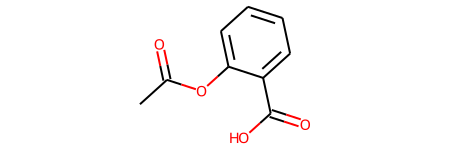

In [152]:
example_mol_obj

<div style="text-align: justify">
    The <b><i>calculate_druglikeness</b></i> function can then be used to calculate several molecular properties and drug-likeness scores, which will be returned as a dictionary:
</div>    

In [153]:
RDKit.calculate_druglikeness(mol_obj=example_mol_obj)

# NBVAL_CHECK_OUTPUT

{'mol_weight': 180.159,
 'num_H_acceptors': 3,
 'num_H_donors': 1,
 'logp': 1.31,
 'tpsa': 63.6,
 'num_rot_bonds': 2,
 'saturation': 0.11,
 'drug_score_qed': 0.55,
 'drug_score_lipinski': 1.0,
 'drug_score_custom': 0.72,
 'drug_score_total': 0.68}

<div style="text-align: justify">
    The <b><i>calculate_similarity_dice</b></i> function is used to calculate the Dice similarity metric between two ligands using a 4096-bit Morgan fingerprints with a raidus of 2. Here, as an example we will input the same molecule twice which results in a similarity score of 1 (i.e. 100% similarity): 
</div>    

In [154]:
RDKit.calculate_similarity_dice(mol_obj1=example_mol_obj, mol_obj2=example_mol_obj)

# NBVAL_CHECK_OUTPUT

1.0

<div style="text-align: justify">
    Using the <b><i>save_molecule_image_to_file</b></i> function, an image file containing the ligand's structure can be saved at a given path as well: 
</div>

In [155]:
RDKit.save_molecule_image_to_file(
    mol_obj=example_mol_obj, filepath=example_output_path / "aspirin"
)

<div style="text-align: justify">
    In addition, we can use the <b><i>save_3D_molecule_to_SDfile</b></i> function which prepares the molecule for docking calcluations i.e. adds hydrogen atoms, creates 3D conformation and runs energy minimizations etc. It is then saved as an SDF file:
</div>     

In [156]:
RDKit.save_3D_molecule_to_SDfile(mol_obj=example_mol_obj, filepath=example_output_path / "aspirin")

<a id='dogsitescorer_demo'></a>

## Demonstration of The ***DoGSiteScorer*** Class

<div style="text-align: justify">
    If we want to detect the binding sites of a protein from a local PDB file, we should first upload the file to the <i>DogSiteScorer</i> webserver using the <b><i>upload_pdb_file</b></i> function. For this, we will use the PDB file we downloaded earlier: 
</div>

In [157]:
example_dummy_pdb_id = DoGSiteScorer.upload_pdb_file(filepath=example_downloaded_protein_filepath)

example_dummy_pdb_id

'3w32pdb5756064e-1692-4edf-9f59-fa02f4b622ca'

<div style="text-align: justify">
    The <b><i>upload_pdb_file</b></i> returns a dummy PDB-code for the uploaded structure which can be used in place of a valid PDB-code to submit a binding-site detection job. Notice that the <b><i>submit_job</b></i> function can also take in a chain-ID to limit the detection on that specific chain, and a ligand-ID to also calculate the coverage of each detected binding-site. However, the ligand-ID that <i>DoGSiteScorer</i> accepts has its own format and is not the same as the ligand-ID in the protein PDB file. 
</div>    

<br>

<div style="text-align: justify">
   Nevertheless, it follows the following format: (ligand-ID)_(chain-ID)_(ligand residue-ID). When implementing the <b><i>BindingSiteDetection</b></i> class, we will circumvent this by automatically generating the <i>DogSiteScorer</i> ligand-ID from the normal ligand-ID so that the user does not have to manually look up and enter the ligand-ID in this specific format. This process should take <b> about one minute </b> to complete.
</div> 

In [158]:
example_binding_site_data = DoGSiteScorer.submit_job(
    pdb_id=example_dummy_pdb_id, ligand_id="W32_A_1101", chain_id="A"
)

example_binding_site_data

# NBVAL_CHECK_OUTPUT

,lig_cov,poc_cov,lig_name,volume,enclosure,surface,depth,surf/vol,lid/hull,ellVol,ell c/a,ell b/a,siteAtms,accept,donor,hydrophobic_interactions,hydrophobicity,metal,Cs,Ns,Os,Ss,Xs,negAA,posAA,polarAA,apolarAA,ALA,ARG,ASN,ASP,CYS,GLN,GLU,GLY,HIS,ILE,LEU,LYS,MET,PHE,PRO,SER,THR,TRP,TYR,VAL,simpleScore,drugScore,pdb_file_url,ccp4_file_url
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P_0,85.48,31.22,W32_A_1101,1422.66,0.10,1673.75,19.26,1.176493,-,-,0.13,0.67,288,86,40,71,0.36,0,198,45,41,4,0,0.10,0.13,0.24,0.53,4,5,2,5,2,2,1,5,0,3,12,3,2,3,3,1,2,1,1,5,0.63,0.810023,https://proteins.plus/results/dogsite/op9og3wqcXrS2PD3sxm2krhR/3w32pdb5756064e-1692-4edf-9f59-fa02f4b622ca_P_0_res.pdb,https://proteins.plus/results/dogsite/op9og3wqcXrS2PD3sxm2krhR/3w32pdb5756064e-1692-4edf-9f59-fa02f4b622ca_P_0_gpsAll.ccp4.gz
P_0_0,85.48,73.90,W32_A_1101,599.23,0.06,540.06,17.51,0.901257,-,-,0.14,0.22,131,35,13,25,0.34,0,95,16,17,3,0,0.03,0.10,0.28,0.59,1,2,1,1,2,1,0,2,0,2,7,1,2,2,1,0,2,0,0,2,0.59,0.620201,https://proteins.plus/results/dogsite/op9og3wqcXrS2PD3sxm2krhR/3w32pdb5756064e-1692-4edf-9f59-fa02f4b622ca_P_0_0_res.pdb,https://proteins.plus/results/dogsite/op9og3wqcXrS2PD3sxm2krhR/3w32pdb5756064e-1692-4edf-9f59-fa02f4b622ca_P_0_0_gpsAll.ccp4.gz
P_0_1,3.23,0.44,W32_A_1101,201.73,0.08,381.07,11.36,1.889010,-,-,0.17,0.25,51,17,9,10,0.28,0,36,6,7,2,0,0.08,0.17,0.25,0.50,1,1,0,1,1,1,0,0,0,0,3,1,1,0,0,0,1,0,0,1,0.17,0.174816,https://proteins.plus/results/dogsite/op9og3wqcXrS2PD3sxm2krhR/3w32pdb5756064e-1692-4edf-9f59-fa02f4b622ca_P_0_1_res.pdb,https://proteins.plus/results/dogsite/op9og3wqcXrS2PD3sxm2krhR/3w32pdb5756064e-1692-4edf-9f59-fa02f4b622ca_P_0_1_gpsAll.ccp4.gz
P_0_2,0.00,0.00,W32_A_1101,185.60,0.17,282.00,9.35,1.519397,-,-,0.45,0.55,48,17,8,12,0.32,0,31,8,8,1,0,0.17,0.25,0.08,0.50,0,2,0,1,0,0,1,1,0,0,2,1,1,1,0,0,0,0,0,2,0.13,0.195695,https://proteins.plus/results/dogsite/op9og3wqcXrS2PD3sxm2krhR/3w32pdb5756064e-1692-4edf-9f59-fa02f4b622ca_P_0_2_res.pdb,https://proteins.plus/results/dogsite/op9og3wqcXrS2PD3sxm2krhR/3w32pdb5756064e-1692-4edf-9f59-fa02f4b622ca_P_0_2_gpsAll.ccp4.gz
P_0_3,6.45,0.29,W32_A_1101,175.30,0.15,297.42,9.29,1.696634,-,-,0.23,0.37,48,16,8,14,0.37,0,32,8,8,0,0,0.14,0.14,0.36,0.36,1,1,1,2,0,0,0,3,0,0,1,1,0,1,1,1,0,0,0,1,0.13,0.168845,https://proteins.plus/results/dogsite/op9og3wqcXrS2PD3sxm2krhR/3w32pdb5756064e-1692-4edf-9f59-fa02f4b622ca_P_0_3_res.pdb,https://proteins.plus/results/dogsite/op9og3wqcXrS2PD3sxm2krhR/3w32pdb5756064e-1692-4edf-9f59-fa02f4b622ca_P_0_3_gpsAll.ccp4.gz
P_0_4,0.00,0.00,W32_A_1101,170.37,0.08,390.10,11.99,2.289722,-,-,0.16,0.20,47,14,7,17,0.45,0,34,7,6,0,0,0.00,0.18,0.18,0.64,2,2,0,0,0,1,0,0,0,1,3,0,0,0,0,0,0,1,1,0,0.15,0.223742,https://proteins.plus/results/dogsite/op9og3wqcXrS2PD3sxm2krhR/3w32pdb5756064e-1692-4edf-9f59-fa02f4b622ca_P_0_4_res.pdb,https://proteins.plus/results/dogsite/op9og3wqcXrS2PD3sxm2krhR/3w32pdb5756064e-1692-4edf-9f59-fa02f4b622ca_P_0_4_gpsAll.ccp4.gz
P_0_5,0.00,0.00,W32_A_1101,90.43,0.24,177.50,6.24,1.962844,-,-,0.70,0.89,26,8,6,5,0.26,0,16,6,4,0,0,0.12,0.25,0.25,0.38,0,1,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,2,0.00,0.165232,https://proteins.plus/results/dogsite/op9og3wqcXrS2PD3sxm2krhR/3w32pdb5756064e-1692-4edf-9f59-fa02f4b622ca_P_0_5_res.pdb,https://proteins.plus/results/dogsite/op9og3wqcXrS2PD3sxm2krhR/3w32pdb5756064e-1692-4edf-9f59-fa02f4b622ca_P_0_5_gpsAll.ccp4.gz
P_1,0.00,0.00,W32_A_1101,708.99,0.13,1030.19,14.32,1.453039,-,-,0.14,0.59,140,44,13,34,0.37,0,98,17,25,0,0,0.14,0.11,0.36,0.39,3,1,1,0,0,0,4,4,0,1,4,2,0,1,1,2,2,0,1,1,0.46,0.755915,https://proteins.plus/results/dogsite/op9og3wqcXrS2PD3sxm2krhR/3w32pdb5756064e-1692-4edf-9f59-fa02f4b622ca_P_1_res.pdb,https://proteins.plus/results/dogsite/op9og3wqcXrS2PD3sxm2krhR/3w32pdb5756064e-1692-4edf-9f59-fa02f4b622ca_P_1_gpsAll.ccp4.gz
P_1_0,0.00,0.00,W32_A_1101,496.90,0.11,739.17,12.72,1.487563,-,-,0.14,0.18,103,34,8,22,0.34,0,74,12,17,0,0,0.18,0.09,0.32,0.41,2,1,1,0,0,0,4,1,0,1,4,1,0,0,1,2,2,0,1,1,0.49,0.465489,https

<div style="text-align: justify">
    Alternatively, we can also use a valid PDB-code to directly submit a binding-site detection job:  
</div>    

In [159]:
DoGSiteScorer.submit_job(
    pdb_id=project1.Protein.pdb_code,
    ligand_id="W32_A_1101",
    chain_id=project1.Protein.chains[0],
)

# NBVAL_CHECK_OUTPUT

,lig_cov,poc_cov,lig_name,volume,enclosure,surface,depth,surf/vol,lid/hull,ellVol,ell c/a,ell b/a,siteAtms,accept,donor,hydrophobic_interactions,hydrophobicity,metal,Cs,Ns,Os,Ss,Xs,negAA,posAA,polarAA,apolarAA,ALA,ARG,ASN,ASP,CYS,GLN,GLU,GLY,HIS,ILE,LEU,LYS,MET,PHE,PRO,SER,THR,TRP,TYR,VAL,simpleScore,drugScore,pdb_file_url,ccp4_file_url
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P_0,85.48,31.22,W32_A_1101,1422.66,0.10,1673.75,19.26,1.176493,-,-,0.13,0.67,288,86,40,71,0.36,0,198,45,41,4,0,0.10,0.13,0.24,0.53,4,5,2,5,2,2,1,5,0,3,12,3,2,3,3,1,2,1,1,5,0.63,0.810023,https://proteins.plus/results/dogsite/hy3pFFwQv1ecUMY2bh9tcErj/3w32_P_0_res.pdb,https://proteins.plus/results/dogsite/hy3pFFwQv1ecUMY2bh9tcErj/3w32_P_0_gpsAll.ccp4.gz
P_0_0,85.48,73.90,W32_A_1101,599.23,0.06,540.06,17.51,0.901257,-,-,0.14,0.22,131,35,13,25,0.34,0,95,16,17,3,0,0.03,0.10,0.28,0.59,1,2,1,1,2,1,0,2,0,2,7,1,2,2,1,0,2,0,0,2,0.59,0.620201,https://proteins.plus/results/dogsite/hy3pFFwQv1ecUMY2bh9tcErj/3w32_P_0_0_res.pdb,https://proteins.plus/results/dogsite/hy3pFFwQv1ecUMY2bh9tcErj/3w32_P_0_0_gpsAll.ccp4.gz
P_0_1,3.23,0.44,W32_A_1101,201.73,0.08,381.07,11.36,1.889010,-,-,0.17,0.25,51,17,9,10,0.28,0,36,6,7,2,0,0.08,0.17,0.25,0.50,1,1,0,1,1,1,0,0,0,0,3,1,1,0,0,0,1,0,0,1,0.17,0.174816,https://proteins.plus/results/dogsite/hy3pFFwQv1ecUMY2bh9tcErj/3w32_P_0_1_res.pdb,https://proteins.plus/results/dogsite/hy3pFFwQv1ecUMY2bh9tcErj/3w32_P_0_1_gpsAll.ccp4.gz
P_0_2,0.00,0.00,W32_A_1101,185.60,0.17,282.00,9.35,1.519397,-,-,0.45,0.55,48,17,8,12,0.32,0,31,8,8,1,0,0.17,0.25,0.08,0.50,0,2,0,1,0,0,1,1,0,0,2,1,1,1,0,0,0,0,0,2,0.13,0.195695,https://proteins.plus/results/dogsite/hy3pFFwQv1ecUMY2bh9tcErj/3w32_P_0_2_res.pdb,https://proteins.plus/results/dogsite/hy3pFFwQv1ecUMY2bh9tcErj/3w32_P_0_2_gpsAll.ccp4.gz
P_0_3,6.45,0.29,W32_A_1101,175.30,0.15,297.42,9.29,1.696634,-,-,0.23,0.37,48,16,8,14,0.37,0,32,8,8,0,0,0.14,0.14,0.36,0.36,1,1,1,2,0,0,0,3,0,0,1,1,0,1,1,1,0,0,0,1,0.13,0.168845,https://proteins.plus/results/dogsite/hy3pFFwQv1ecUMY2bh9tcErj/3w32_P_0_3_res.pdb,https://proteins.plus/results/dogsite/hy3pFFwQv1ecUMY2bh9tcErj/3w32_P_0_3_gpsAll.ccp4.gz
P_0_4,0.00,0.00,W32_A_1101,170.37,0.08,390.10,11.99,2.289722,-,-,0.16,0.20,47,14,7,17,0.45,0,34,7,6,0,0,0.00,0.18,0.18,0.64,2,2,0,0,0,1,0,0,0,1,3,0,0,0,0,0,0,1,1,0,0.15,0.223742,https://proteins.plus/results/dogsite/hy3pFFwQv1ecUMY2bh9tcErj/3w32_P_0_4_res.pdb,https://proteins.plus/results/dogsite/hy3pFFwQv1ecUMY2bh9tcErj/3w32_P_0_4_gpsAll.ccp4.gz
P_0_5,0.00,0.00,W32_A_1101,90.43,0.24,177.50,6.24,1.962844,-,-,0.70,0.89,26,8,6,5,0.26,0,16,6,4,0,0,0.12,0.25,0.25,0.38,0,1,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,2,0.00,0.165232,https://proteins.plus/results/dogsite/hy3pFFwQv1ecUMY2bh9tcErj/3w32_P_0_5_res.pdb,https://proteins.plus/results/dogsite/hy3pFFwQv1ecUMY2bh9tcErj/3w32_P_0_5_gpsAll.ccp4.gz
P_1,0.00,0.00,W32_A_1101,708.99,0.13,1030.19,14.32,1.453039,-,-,0.14,0.59,140,44,13,34,0.37,0,98,17,25,0,0,0.14,0.11,0.36,0.39,3,1,1,0,0,0,4,4,0,1,4,2,0,1,1,2,2,0,1,1,0.46,0.755915,https://proteins.plus/results/dogsite/hy3pFFwQv1ecUMY2bh9tcErj/3w32_P_1_res.pdb,https://proteins.plus/results/dogsite/hy3pFFwQv1ecUMY2bh9tcErj/3w32_P_1_gpsAll.ccp4.gz
P_1_0,0.00,0.00,W32_A_1101,496.90,0.11,739.17,12.72,1.487563,-,-,0.14,0.18,103,34,8,22,0.34,0,74,12,17,0,0,0.18,0.09,0.32,0.41,2,1,1,0,0,0,4,1,0,1,4,1,0,0,1,2,2,0,1,1,0.49,0.465489,https://proteins.plus/results/dogsite/hy3pFFwQv1ecUMY2bh9tcErj/3w32_P_1_0_res.pdb,https://proteins.plus/results/dogsite/hy3pFFwQv1ecUMY2bh9tcErj/3w32_P_1_0_gpsAll.ccp4.gz


<div style="text-align: justify">
    As can be seen, the <b><i>submit_job</b></i> function returns a DataFrame containing all the detected binding-sites and their respective properties. It also contains the URLs of the PDB and CCP4 files for each of the detected binding-sites, which will be used to download the files later. Among the calculated properties, the most important are <b><i>drugScore</b></i>, <b><i>simpleScore</b></i>, <b><i>volume</b></i>, as well as <b><i>lig_cov</b></i> and <b><i>poc_cov</b></i> for when a ligand-ID is also inputted. The list of all properties can be accessed by retrieving the column names of the DataFrame: 
</div>

In [160]:
example_binding_site_data.columns

# NBVAL_CHECK_OUTPUT

Index(['lig_cov', 'poc_cov', 'lig_name', 'volume', 'enclosure', 'surface',
       'depth', 'surf/vol', 'lid/hull', 'ellVol', 'ell c/a', 'ell b/a',
       'siteAtms', 'accept', 'donor', 'hydrophobic_interactions',
       'hydrophobicity', 'metal', 'Cs', 'Ns', 'Os', 'Ss', 'Xs', 'negAA',
       'posAA', 'polarAA', 'apolarAA', 'ALA', 'ARG', 'ASN', 'ASP', 'CYS',
       'GLN', 'GLU', 'GLY', 'HIS', 'ILE', 'LEU', 'LYS', 'MET', 'PHE', 'PRO',
       'SER', 'THR', 'TRP', 'TYR', 'VAL', 'simpleScore', 'drugScore',
       'pdb_file_url', 'ccp4_file_url'],
      dtype='object')

<div style="text-align: justify">
    The <b><i>simpleScore</b></i> is a simple druggability score, based on a linear combination of the three descriptors describing volume, hydrophobicity and enclosure. In addition, a subset of meaningful descriptors is incorporated in a support vector machine (libsvm) to predict a druggability score called <b><i>drugScore</b></i>, which has a value between 0 and 1 (the higher the score the more druggable the binding-site is estimated to be). <b><i>lig_cov</b></i> gives the percentage of the ligand volume that is covered by the binding-site, and <b><i>poc_cov</b></i> gives the percentage of the binding-site volume that is covered by the ligand.
</div>

<br>

<div style="text-align: justify">
    Depending on the specifics of the project, these values can be used to select the most-suitable detected binding-site. Here, we have implemented two possibilities for this selection process in the <b><i>select_best_pocket</b></i> function. The first option is to provide a list of properties in order of importance, based on which the binding-site with the highest or lowest value is to be chosen. The function then returns the name of the selected binding-site. The list of properties should be inputted as a list:
</div>

In [161]:
example_best_pocket_name = DoGSiteScorer.select_best_pocket(
    binding_site_df=example_binding_site_data,
    selection_method="sorting",
    selection_criteria=["lig_cov", "poc_cov"],
    ascending=False,
)

example_best_pocket_name

# NBVAL_CHECK_OUTPUT

'P_0_0'

<div style="text-align: justify">
    For example, the above <b><i>selection_criteria</b></i> sorts the binding-sites by their <b><i>lig_cov</b></i> values and if there are two or more binding-sites with the same <b><i>lig_cov</b></i> value, it then sorts them by their <b><i>poc_cov</b></i> values.
</div>

<br>

<div style="text-align: justify">
    Another possibility for selecting a binding site is to provide any valid python expression that generates a list-like object with the same length as the number of detected binding-site. This python expression is inputted as string, so the user can directly input a python expression in the input CSV file and it will be evaluated during the runtime.
</div>

<br>

<div style="text-align: justify">
     For example, using this method we can perform any calculation on the properties in the binding-site DataFrame. Note that for referring to the binding-site dataframe, <b>'df'</b> should be used:
</div>

In [162]:
DoGSiteScorer.select_best_pocket(
    binding_site_df=example_binding_site_data,
    selection_method="function",
    selection_criteria="((df['lig_cov'] + df['poc_cov']) / 2) * ((df['drugScore'] + df['simpleScore']) / 2) / df['volume']",
    ascending=False,
)

# NBVAL_CHECK_OUTPUT

'P_0_0'

<div style="text-align: justify">
    For example, the above <b><i>selection_criteria</b></i> is a function that calculates the average of <b><i>lig_cov</b></i> and <b><i>poc_cov</b></i>, as well as the average of <b><i>drugScore</b></i> and <b><i>simpleScore</b></i>, multiplies the two together and then divides the result by the <b><i>volume</b></i>. The binding-site that has the highest value is then chosen. If we want to have the lowest value, we can set the <b><i>ascending</b></i> parameter to False. Note that the dataframe should always be referred to as <b>'df'</b>. Another example is: 
</div>    

In [163]:
DoGSiteScorer.select_best_pocket(
    binding_site_df=example_binding_site_data,
    selection_method="function",
    selection_criteria="df[['drugScore', 'simpleScore']].min(axis=1) * df[['poc_cov', 'lig_cov']].max(axis=1)",
    ascending=False,
)

# NBVAL_CHECK_OUTPUT

'P_0'

<div style="text-align: justify">
    The above example calculates the minimum value between <b><i>drugScore</b></i> and <b><i>simpleScore</b></i>, and multiplies the results with the maximum value between the<b><i>poc_cov</b></i> and <b><i>lig_cov</b></i>. 
</div>    

<br>

<div style="text-align: justify">
    We now want to calculate the coordinates of the selected binding-site, so that we can use it in the docking process. For this, we first need to download the PDB files of the detected binding-sites, using the <b><i>save_binding_sites_to_file</b></i> function: 
</div>    

In [164]:
DoGSiteScorer.save_binding_sites_to_file(
    binding_site_df=example_binding_site_data, output_path=example_output_path
)

<div style="text-align: justify">
    Having downloaded the necessary binding-site files, we can now calculate the coordinates of the selected binding-site: 
</div>    

In [165]:
DoGSiteScorer.calculate_pocket_coordinates_from_pocket_pdb_file(
    filepath=example_output_path / example_best_pocket_name
)

# NBVAL_CHECK_OUTPUT

{'center': [15.91, 32.33, 11.03], 'size': [24.84, 24.84, 24.84]}